#-------------ML 4° APPROACHES------------









##import data

In [1]:
# Step 1: Monta Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Importa le librerie necessarie
import pandas as pd
import time
from IPython.display import display, Javascript

# Funzione per mantenere attivo il notebook
def keep_alive():
    display(Javascript('window.setInterval(function(){document.body.style.zoom="100%"}, 10000);'))

# Avviare la funzione keep_alive all'inizio del notebook
keep_alive()

# Step 3: Specifica il percorso del file .dta
file_path = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/dt_completo_04_11_2024_quarto.csv'# 3 milioni righe TARGET1 0:89% 1:11%->CREARE DT PROPORZIONATO 100K T1 (la target 2 si puo creare )


#file_path='/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/dt_completo_04_11_2024_secondo_terzo_DOWNSAMPLING_16000.csv'
#file_path='/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/dt_completo_04_11_2024_secondo_terzo_PROPORTIONAL_20000.csv'



# Step 4: Carica il file .dta in un DataFrame
df = pd.read_csv(file_path)

# Step 5: Visualizza le prime righe del DataFrame per verificare l'importazione
df




Mounted at /content/drive


<IPython.core.display.Javascript object>

<ipython-input-1-cee6ac8cf59f>:27: DtypeWarning: Columns (5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,cod_reg,cod_ist,reg_res,prov_res,com_res,cittad,eta,mod_dim,disc,codice,...,ynel26,ynel27,ynel28,ynel29,ynel30,ynel31,elixsum,target,elixsum3,DIAGNOSI
0,10,3,10,1,80,100,43,1.0,9,A000000046193699,...,0,0,0,0,0,0,1,1,1.0,"Colostomy status; Fistula of intestine, exclud..."
1,10,3,10,96,22,100,70,2.0,12,A000000005695721,...,0,0,0,0,0,0,0,0,0.0,"Pressure ulcer, lower back; Other functional d..."
2,10,3,10,1,265,100,73,1.0,26,A000000009356867,...,0,0,0,0,0,0,2,1,2.0,Acute respiratory failure; Malignant neoplasm ...
3,10,3,10,1,272,100,83,8.0,43,A000000035364919,...,0,0,0,0,0,0,2,0,2.0,Malignant neoplasm of lateral wall of urinary ...
4,10,3,10,1,272,100,64,2.0,43,A000000044748792,...,0,0,0,0,0,0,2,0,2.0,Malignant neoplasm of prostate; Other pulmonar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456482,200,906,200,91,44,100,65,2.0,64,A000000047290338,...,0,0,0,0,0,0,2,0,2.0,Encounter for antineoplastic chemotherapy; Mal...
3456483,200,906,200,92,59,100,63,2.0,64,A000000020186108,...,0,0,0,0,0,0,2,0,2.0,Malignant neoplasm of ovary; Secondary and uns...
3456484,200,906,200,92,9,100,51,2.0,38,A000000066182524,...,0,0,0,0,0,0,0,0,0.0,Benign neoplasm of cranial nerves; Sensorineur...
3456485,200,906,200,104,14,100,75,2.0,64,A000000044631506,...,0,0,0,0,0,0,2,0,2.0,Malignant neoplasm of descending colon; Malign...


In [ ]:
df.columns

Index(['cod_reg', 'cod_ist', 'reg_res', 'prov_res', 'com_res', 'cittad', 'eta',
       'mod_dim', 'disc', 'codice', 'cosp', 'id', 'female', 'los', 'anno_rif',
       'ynel1', 'ynel2', 'ynel3', 'ynel4', 'ynel5', 'ynel6', 'ynel7', 'ynel8',
       'ynel9', 'ynel10', 'ynel11', 'ynel12', 'ynel13', 'ynel14', 'ynel15',
       'ynel16', 'ynel17', 'ynel18', 'ynel19', 'ynel20', 'ynel21', 'ynel22',
       'ynel23', 'ynel24', 'ynel25', 'ynel26', 'ynel27', 'ynel28', 'ynel29',
       'ynel30', 'ynel31', 'elixsum', 'target', 'elixsum3', 'DIAGNOSI'],
      dtype='object')

##change the class of the variables->coinvert variables from  categorical  to numeric

In [2]:
# Supponiamo che il DataFrame sia chiamato df_downsampled
col_to_convert = ['codice', 'disc', 'cittad']
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Converti ogni colonna alfanumerica in numerica usando la codifica delle etichette
for col in col_to_convert:
   # df_downsampled[col] = df_downsampled[col].astype('category').cat.codes
    df[col] = df[col].astype('category').cat.codes


# Mostra i tipi di dato delle colonne
#print(df_downsampled.dtypes)
print(df.dtypes)


cod_reg       int64
cod_ist       int64
reg_res       int64
prov_res      int64
com_res       int64
cittad        int16
eta           int64
mod_dim     float64
disc           int8
codice        int32
cosp          int64
id            int64
female        int64
los           int64
anno_rif      int64
ynel1         int64
ynel2         int64
ynel3         int64
ynel4         int64
ynel5         int64
ynel6         int64
ynel7         int64
ynel8         int64
ynel9         int64
ynel10        int64
ynel11        int64
ynel12        int64
ynel13        int64
ynel14        int64
ynel15        int64
ynel16        int64
ynel17        int64
ynel18        int64
ynel19        int64
ynel20        int64
ynel21        int64
ynel22        int64
ynel23        int64
ynel24        int64
ynel25        int64
ynel26        int64
ynel27        int64
ynel28        int64
ynel29        int64
ynel30        int64
ynel31        int64
elixsum       int64
target        int64
elixsum3    float64
DIAGNOSI     object


In [3]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')


##drop the NA's in dpr_long_description

In [4]:
# Rimuovi le righe in cui 'col1' ha valori NaN
#df = df.dropna(subset=['dpr_LONG_DESCRIPTION'])
#df = df.dropna(subset=['dpr_LONG_DESCRIPTION','target'])
# Rimuove le righe dove la colonna 'DIAGNOSI' ha valore NaN
df = df.dropna(subset=['DIAGNOSI', 'target'])#, 'LONG_DESCRIPTION'


df

,cod_reg,cod_ist,reg_res,prov_res,com_res,cittad,eta,mod_dim,disc,codice,...,ynel26,ynel27,ynel28,ynel29,ynel30,ynel31,elixsum,target,elixsum3,DIAGNOSI
0,10,3,10,1,80,1,43,1.0,7,1843646,...,0,0,0,0,0,0,1,1,1.0,"Colostomy status; Fistula of intestine, exclud..."
1,10,3,10,96,22,1,70,2.0,10,253350,...,0,0,0,0,0,0,0,0,0.0,"Pressure ulcer, lower back; Other functional d..."
2,10,3,10,1,265,1,73,1.0,20,414422,...,0,0,0,0,0,0,2,1,2.0,Acute respiratory failure; Malignant neoplasm ...
3,10,3,10,1,272,1,83,8.0,34,1467450,...,0,0,0,0,0,0,2,0,2.0,Malignant neoplasm of lateral wall of urinary ...
4,10,3,10,1,272,1,64,2.0,34,1800240,...,0,0,0,0,0,0,2,0,2.0,Malignant neoplasm of prostate; Other pulmonar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456482,200,906,200,91,44,1,65,2.0,47,1884543,...,0,0,0,0,0,0,2,0,2.0,Encounter for antineoplastic chemotherapy; Mal...
3456483,200,906,200,92,59,1,63,2.0,47,880142,...,0,0,0,0,0,0,2,0,2.0,Malignant neoplasm of ovary; Secondary and uns...
3456484,200,906,200,92,9,1,51,2.0,30,2698992,...,0,0,0,0,0,0,0,0,0.0,Benign neoplasm of cranial nerves; Sensorineur...
3456485,200,906,200,104,14,1,75,2.0,47,1795166,...,0,0,0,0,0,0,2,0,2.0,Malignant neoplasm of descending colon; Malign...


##DT PROPORZIONATO

In [ ]:
import pandas as pd

# Supponiamo che il tuo DataFrame originale si chiami df
# df = pd.read_csv("tuo_dataset.csv")

# Verifica la distribuzione attuale del target
print("Distribuzione originale del target:")
print(df['target'].value_counts(normalize=True))

# Campionamento stratificato: campiona 50.000 osservazioni mantenendo la proporzione del target

#df = df.groupby('target', group_keys=False).apply(lambda x: x.sample(int(1001 * len(x) / len(df)), random_state=42))

#df = df.groupby('target', group_keys=False).apply(lambda x: x.sample(int(50001 * len(x) / len(df)), random_state=42))
#df = df.groupby('target', group_keys=False).apply(lambda x: x.sample(int(3100001 * len(x) / len(df)), random_state=42))

df = df.groupby('target', group_keys=False).apply(lambda x: x.sample(int(3300001 * len(x) / len(df)), random_state=42))




# Verifica la distribuzione del target nel campione
print("\nDistribuzione del target nel campione:")
print(df['target'].value_counts(normalize=True))

# Mostra le prime righe del dataset campionato
print("\nPrime righe del dataset campionato:")
df




#####TUTTE

In [5]:
# Supponiamo che il tuo dataset si chiami dt e tu voglia mantenere solo alcune colonne
#columns_to_keep = ['codice', 'disc', 'los', 'female', 'eta', 'elixsum', 'elixhauser_walraven','elixsum3', 'DIAGNOSI', 'DIAGNOSI2', 'DIAGNOSI3', 'DIAGNOSI4', 'target']  # Inserisci qui i nomi delle colonne

columns_to_keep = [ 'disc', 'los', 'female', 'eta','cod_reg','com_res','prov_res',

 'ynel1', 'ynel2', 'ynel3', 'ynel4', 'ynel5', 'ynel6', 'ynel7', 'ynel8', 'ynel9',
 'ynel10', 'ynel11', 'ynel12', 'ynel13', 'ynel14', 'ynel15', 'ynel16',
 'ynel17', 'ynel18', 'ynel19', 'ynel20', 'ynel21', 'ynel22', 'ynel23', 'ynel24',
 'ynel25', 'ynel26', 'ynel27', 'ynel28', 'ynel29', 'ynel30', 'ynel31',

  'target' , 'elixsum3',

 'DIAGNOSI']

df = df[columns_to_keep]


df

,disc,los,female,eta,cod_reg,com_res,prov_res,ynel1,ynel2,ynel3,...,ynel25,ynel26,ynel27,ynel28,ynel29,ynel30,ynel31,target,elixsum3,DIAGNOSI
0,7,223,0,43,10,80,1,0,0,0,...,0,0,0,0,0,0,0,1,1.0,"Colostomy status; Fistula of intestine, exclud..."
1,10,71,0,70,10,22,96,0,0,0,...,0,0,0,0,0,0,0,0,0.0,"Pressure ulcer, lower back; Other functional d..."
2,20,39,0,73,10,265,1,0,0,0,...,0,0,0,0,0,0,0,1,2.0,Acute respiratory failure; Malignant neoplasm ...
3,34,31,1,83,10,272,1,0,1,0,...,0,0,0,0,0,0,0,0,2.0,Malignant neoplasm of lateral wall of urinary ...
4,34,36,0,64,10,272,1,0,0,0,...,0,0,0,0,0,0,0,0,2.0,Malignant neoplasm of prostate; Other pulmonar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456482,47,5,0,65,200,44,91,0,0,0,...,0,0,0,0,0,0,0,0,2.0,Encounter for antineoplastic chemotherapy; Mal...
3456483,47,6,1,63,200,59,92,0,0,0,...,0,0,0,0,0,0,0,0,2.0,Malignant neoplasm of ovary; Secondary and uns...
3456484,30,5,0,51,200,9,92,0,0,0,...,0,0,0,0,0,0,0,0,0.0,Benign neoplasm of cranial nerves; Sensorineur...
3456485,47,3,0,75,200,14,104,0,0,0,...,0,0,0,0,0,0,0,0,2.0,Malignant neoplasm of descending colon; Malign...


In [ ]:
df.columns

Index(['disc', 'los', 'female', 'eta', 'cod_reg', 'com_res', 'prov_res',
       'ynel1', 'ynel2', 'ynel3', 'ynel4', 'ynel5', 'ynel6', 'ynel7', 'ynel8',
       'ynel9', 'ynel10', 'ynel11', 'ynel12', 'ynel13', 'ynel14', 'ynel15',
       'ynel16', 'ynel17', 'ynel18', 'ynel19', 'ynel20', 'ynel21', 'ynel22',
       'ynel23', 'ynel24', 'ynel25', 'ynel26', 'ynel27', 'ynel28', 'ynel29',
       'ynel30', 'ynel31', 'target', 'elixsum3', 'DIAGNOSI'],
      dtype='object')

#####label enconding and int64

In [6]:
cols_to_convert = ['disc','cod_reg', 'prov_res','com_res','female', 'ynel1', 'ynel2', 'ynel3', 'ynel4', 'ynel5', 'ynel6', 'ynel7', 'ynel8', 'ynel9',
 'ynel10', 'ynel11', 'ynel12', 'ynel13', 'ynel14', 'ynel15', 'ynel16',
 'ynel17', 'ynel18', 'ynel19', 'ynel20', 'ynel21', 'ynel22', 'ynel23', 'ynel24',
 'ynel25', 'ynel26', 'ynel27', 'ynel28', 'ynel29', 'ynel30', 'ynel31',

  'target']
df[cols_to_convert] = df[cols_to_convert].apply(lambda x: x.astype('category'))

# Visualizzo il DataFrame aggiornato



<ipython-input-6-ae0c4c5c6a09>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_convert] = df[cols_to_convert].apply(lambda x: x.astype('category'))


In [7]:
import pandas as pd
import numpy as np

# Creazione di un DataFrame di esempio


# Controllo del tipo originale
print("Tipi originali:\n", df.dtypes)

# Conversione della colonna 'valore_float' da float64 a int64
df['elixsum3'] = df['elixsum3'].astype('int64')

# Controllo del tipo dopo la conversione
print("\nTipi dopo la conversione:\n", df.dtypes)

# Visualizza il DataFrame finale
frequenze = df['elixsum3'].value_counts()
print(frequenze)


Tipi originali:
 disc        category
los            int64
female      category
eta            int64
cod_reg     category
com_res     category
prov_res    category
ynel1       category
ynel2       category
ynel3       category
ynel4       category
ynel5       category
ynel6       category
ynel7       category
ynel8       category
ynel9       category
ynel10      category
ynel11      category
ynel12      category
ynel13      category
ynel14      category
ynel15      category
ynel16      category
ynel17      category
ynel18      category
ynel19      category
ynel20      category
ynel21      category
ynel22      category
ynel23      category
ynel24      category
ynel25      category
ynel26      category
ynel27      category
ynel28      category
ynel29      category
ynel30      category
ynel31      category
target      category
elixsum3     float64
DIAGNOSI      object
dtype: object

Tipi dopo la conversione:
 disc        category
los            int64
female      category
eta            in

<ipython-input-7-ad00101fdbdb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['elixsum3'] = df['elixsum3'].astype('int64')


#PREPROCESSING TEXT

In [8]:
import re
import nltk
from nltk.corpus import stopwords

# Assicurati che le risorse necessarie siano scaricate
nltk.download('stopwords')
nltk.download('wordnet')

# Carica la lista di stopwords in inglese
stop_words = set(stopwords.words('english'))

# Funzione di pulizia del testo (rimozione caratteri speciali, numeri, minuscolo)
def clean_text(text):
    # Rimuovi numeri e caratteri speciali, mantenendo solo lettere e spazi
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Converti tutto in minuscolo
    text = text.lower()
    return text

# Funzione per rimuovere le stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Funzione per rimuovere parole con una sola lettera
def remove_single_letter_words(text):
    text = re.sub(r'\b[a-zA-Z]\b', '', text)  # Rimuove parole con una sola lettera
    return text

# Funzione di normalizzazione (rimozione degli spazi extra)
def normalize_text(text):
    text = re.sub(r'\s+', ' ', text)  # Rimuove spazi extra
    return text.strip()

# Funzione di preprocessing finale
def preprocess_text(text):
    text = clean_text(text)  # Rimuovi caratteri speciali e numeri + minuscolo
    text = remove_stopwords(text)  # Rimuovi le stopwords
    text = remove_single_letter_words(text)  # Rimuovi parole con una sola lettera
    text = normalize_text(text)  # Normalizza il testo
    return text

# Funzione che applica il preprocessing a ogni riga del DataFrame
def preprocess_diagnoses(df, column_name):
    df[column_name] = df[column_name].apply(preprocess_text)
    return df

# Applica la funzione di preprocessing al dataframe
df = df.dropna(subset=['DIAGNOSI', 'target'])  # Rimuovi valori mancanti
df = preprocess_diagnoses(df, 'DIAGNOSI')  # Applica il preprocessing alla colonna 'DIAGNOSI'

# Ora il dataframe ha una colonna 'DIAGNOSI' con il testo preprocessato
print(df[['DIAGNOSI']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                            DIAGNOSI
0  colostomy status fistula intestine excluding r...
1  pressure ulcer lower back functional disorders...
2  acute respiratory failure malignant neoplasm l...
3  malignant neoplasm lateral wall urinary bladde...
4  malignant neoplasm prostate pulmonary embolism...


#CALCOLO LUNGHEZZA MASSIMA PAROLE DIAGNOSI

In [ ]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import nltk
from tqdm import tqdm
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from transformers import AutoTokenizer, TFAutoModel, AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import random
import time

# Calcola la lunghezza dei testi puliti
df['text_length'] = df['DIAGNOSI'].apply(lambda x: len(x.split()))

# Calcola le statistiche sulle lunghezze dei testi
max_length = df['text_length'].max()
min_length = df['text_length'].min()
mean_length = df['text_length'].mean()

print(f"Lunghezza massima del testo: {max_length}")
print(f"Lunghezza minima del testo: {min_length}")
print(f"Lunghezza media del testo: {mean_length:.2f}")

# Visualizza le prime righe del DataFrame con le lunghezze dei testi
print(df[['DIAGNOSI', 'text_length']].head())

Lunghezza massima del testo: 88
Lunghezza minima del testo: 1
Lunghezza media del testo: 11.89
                                            DIAGNOSI  text_length
0  colostomy status fistula intestine excluding r...           15
1  pressure ulcer lower back functional disorders...            9
2  acute respiratory failure malignant neoplasm l...           15
3  malignant neoplasm lateral wall urinary bladde...           12
4  malignant neoplasm prostate pulmonary embolism...           19


In [ ]:
import pandas as pd

# Imposta i limiti massimi per righe, colonne e larghezza
pd.set_option('display.max_rows', None)        # Rimuove il limite per il numero di righe da visualizzare
pd.set_option('display.max_columns', None)     # Rimuove il limite per il numero di colonne da visualizzare
pd.set_option('display.max_colwidth', None)    # Rimuove il limite sulla larghezza delle colonne (nessun troncamento)
pd.set_option('display.width', None)           # Rimuove il limite sulla larghezza complessiva della visualizzazione

# Esegui un esempio per visualizzare il DataFrame
df[["DIAGNOSI"]].head(20)
  # Per visualizzare le prime 50 righe


,DIAGNOSI
0,colostomy status fistula intestine excluding rectum anus irritable bowel syndrome cachexia septic shock cardiac arrest
1,pressure ulcer lower back functional disorders intestine anomalies intestine
2,acute respiratory failure malignant neoplasm lower lobe bronchus lung secondary malignant neoplasm bone bone marrow
3,malignant neoplasm lateral wall urinary bladder atrial fibrillation longterm current use antiplateletantithrombotic
4,malignant neoplasm prostate pulmonary embolism infarction acute venous embolism thrombosis deep vessels proximal lower extremity noninfectious disorders lymphatic channels
5,malignant neoplasm parts bronchus lung malignant neoplasm liver secondary secondary unspecified malignant neoplasm intrathoracic lymph nodes cirrhosis liver without mention alcohol chronic hepatitis without mention hepatic coma portal hypertension
6,secondary malignant neoplasm brain spinal cord closed fracture subtrochanteric section neck femur intestinal infection due clostridium difficile specific muscle disorders pressure ulcer lower back paroxysmal supraventricular tachycardia
7,closed fracture epiphysis separation upper neck femur atrial fibrillation pneumonia organism unspecified longterm current use anticoagulants unspecified chronic bronchitis diabetes specified manifestations type ii unspecified type uncontrolled
8,malignant neoplasm pyloric antrum peritoneal adhesions postoperative postinfection acute duodenal ulcer perforation without mention obstruction fistula stomach duodenum intestinal infection due clostridium difficile
9,generalized ischemic cerebrovascular disease anemia chronic disease intestinal infection due clostridium difficile vascular dementia depressed mood neoplasm unspecified nature endocrine glands parts nervous system atrial fibrillation


In [ ]:
import pandas as pd

# Ripristina i valori predefiniti per la visualizzazione di righe, colonne e larghezza
pd.reset_option('display.max_rows')        # Ripristina il limite per il numero di righe
pd.reset_option('display.max_columns')     # Ripristina il limite per il numero di colonne
pd.reset_option('display.max_colwidth')    # Ripristina il limite sulla larghezza delle colonne
pd.reset_option('display.width')           # Ripristina il limite sulla larghezza complessiva della visualizzazione


## con migliori parametri


In [ ]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import nltk
from tqdm import tqdm
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from transformers import AutoTokenizer, TFAutoModel, AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc
import random
import time

# Imposta un seed per la riproducibilità
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Prepara le variabili strutturali e normalizza solo 'los' ed 'eta'
structured_features = ['disc', 'los', 'female', 'eta', 'cod_reg', 'com_res', 'prov_res',
                      'ynel1', 'ynel2', 'ynel3', 'ynel4', 'ynel5', 'ynel6', 'ynel7', 'ynel8', 'ynel9', 'ynel10', 'ynel11', 'ynel12', 'ynel13',
                      'ynel14', 'ynel15', 'ynel16', 'ynel17', 'ynel18', 'ynel19', 'ynel20', 'ynel21', 'ynel22', 'ynel23', 'ynel24', 'ynel25', 'ynel26', 'ynel27', 'ynel28', 'ynel29', 'ynel30', 'ynel31',
                      'elixsum3']

# Assicurati di avere un index per mappare correttamente le predizioni ai dati originali
df = df.reset_index()

# Prepara i dati strutturali
structured_data = df[structured_features].values

# Prepara la variabile target
y = df['target']

# Tokenizzazione con Clinical BERT
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_Discharge_Summary_BERT")
MAX_LEN = 90

def tokenize_and_pad(text, max_len=MAX_LEN):
    tokens = tokenizer(
        text.tolist(),
        max_length=max_len,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )
    return tokens['input_ids'], tokens['attention_mask']

input_ids, attention_masks = tokenize_and_pad(df['DIAGNOSI'])

# Converti input_ids e attention_masks in array NumPy
input_ids = input_ids.numpy()
attention_masks = attention_masks.numpy()

# Suddivisione del dataset in training (70%), validation (10%) e test (20%)
train_input_ids, temp_input_ids, train_masks, temp_masks, train_labels, temp_labels, train_structured, temp_structured, train_index, temp_index = train_test_split(
    input_ids, attention_masks, y, structured_data, df.index, test_size=0.3, stratify=y, random_state=SEED
)

val_input_ids, test_input_ids, val_masks, test_masks, val_labels, test_labels, val_structured, test_structured, val_index, test_index = train_test_split(
    temp_input_ids, temp_masks, temp_labels, temp_structured, temp_index, test_size=(2/3), stratify=temp_labels, random_state=SEED
)

# Creazione del dataset TensorFlow
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices(
    ({"input_ids": train_input_ids, "attention_mask": train_masks, "structured": train_structured}, train_labels)
).shuffle(len(train_input_ids)).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices(
    ({"input_ids": val_input_ids, "attention_mask": val_masks, "structured": val_structured}, val_labels)
).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices(
    ({"input_ids": test_input_ids, "attention_mask": test_masks, "structured": test_structured}, test_labels)
).batch(batch_size)

# Definizione del modello Clinical BERT con variabili strutturali
class ClinicalBERTWithStructuredModelOptimized(tf.keras.Model):
    def __init__(self, lstm_units, dense_units, dropout_rate, name="clinical_bert_with_structured_model_optimized"):
        super(ClinicalBERTWithStructuredModelOptimized, self).__init__(name=name)
        self.bert = TFAutoModel.from_pretrained("emilyalsentzer/Bio_Discharge_Summary_BERT", from_pt=True)

        # LSTM bidirezionale con unità ottimizzate
        self.bilstm = layers.Bidirectional(layers.LSTM(lstm_units, return_sequences=True))

        # Meccanismo di attenzione
        self.attention = layers.Attention()

        # Pooling globale
        self.global_max_pool = layers.GlobalMaxPooling1D()
        self.global_avg_pool = layers.GlobalAveragePooling1D()

        # Elaborazione variabili strutturali
        self.structured_dense_1 = layers.Dense(64, activation="relu")
        self.structured_bn_1 = layers.BatchNormalization()
        self.structured_dropout_1 = layers.Dropout(dropout_rate)

        self.structured_dense_2 = layers.Dense(32, activation="relu")
        self.structured_bn_2 = layers.BatchNormalization()
        self.structured_dropout_2 = layers.Dropout(dropout_rate)

        # Concatenazione e classificazione finale
        self.concat_dense_1 = layers.Dense(dense_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        self.last_dense = layers.Dense(1, activation="sigmoid")

    def call(self, inputs, training=False):
        # Elaborazione del testo
        bert_output = self.bert(inputs['input_ids'], attention_mask=inputs['attention_mask'])[0]
        lstm_output = self.bilstm(bert_output)
        attention_output = self.attention([lstm_output, lstm_output])
        max_pooled = self.global_max_pool(attention_output)
        avg_pooled = self.global_avg_pool(attention_output)
        bert_features = tf.concat([max_pooled, avg_pooled], axis=1)

        # Elaborazione delle variabili strutturali
        structured_features = self.structured_dense_1(inputs['structured'])
        structured_features = self.structured_bn_1(structured_features, training=training)
        structured_features = self.structured_dropout_1(structured_features, training=training)

        structured_features = self.structured_dense_2(structured_features)
        structured_features = self.structured_bn_2(structured_features, training=training)
        structured_features = self.structured_dropout_2(structured_features, training=training)

        # Concatenazione e classificazione
        concatenated = tf.concat([bert_features, structured_features], axis=1)
        dense_output = self.concat_dense_1(concatenated)
        dropout_output = self.dropout(dense_output, training=training)
        model_output = self.last_dense(dropout_output)
        return model_output

# I migliori iperparametri trovati
best_params = {'learning_rate': 0.0002723033322359714, 'dropout_rate': 0.22324148929887044, 'lstm_units': 128, 'dense_units': 32}

# Modello finale con i migliori iperparametri
model = ClinicalBERTWithStructuredModelOptimized(
    lstm_units=best_params['lstm_units'],
    dense_units=best_params['dense_units'],
    dropout_rate=best_params['dropout_rate']
)

# Ottimizzatore con i migliori iperparametri
optimizer = Adam(learning_rate=best_params['learning_rate'])

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Addestramento finale con i migliori iperparametri
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5
)

# Valutazione finale
eval_loss, eval_accuracy = model.evaluate(test_dataset)
print(f"Final loss: {eval_loss:.4f}, Final accuracy: {eval_accuracy:.4f}")

# Report di classificazione
predictions = model.predict(test_dataset)
y_pred = np.around(predictions).astype(int).flatten()
y_true = np.concatenate([y.numpy() for x, y in test_dataset], axis=0)
print(classification_report(y_true, y_pred))

# Aggiungi le previsioni al dataframe di test originale
df_test = df.loc[test_index]  # Ottieni il dataframe di test originale
df_test['target_predetta'] = y_pred  # Aggiungi la colonna delle previsioni




/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

Epoch 1/5
75547/75547 ━━━━━━━━━━━━━━━━━━━━ 3852s 51ms/step - accuracy: 0.9630 - loss: 0.1055 - val_accuracy: 0.9665 - val_loss: 0.0925
Epoch 2/5
75547/75547 ━━━━━━━━━━━━━━━━━━━━ 3824s 50ms/step - accuracy: 0.9663 - loss: 0.0937 - val_accuracy: 0.9671 - val_loss: 0.0901
Epoch 3/5
75547/75547 ━━━━━━━━━━━━━━━━━━━━ 3826s 51ms/step - accuracy: 0.9669 - loss: 0.0908 - val_accuracy: 0.9672 - val_loss: 0.0898
Epoch 4/5
75547/75547 ━━━━━━━━━━━━━━━━━━━━ 3827s 51ms/step - accuracy: 0.9674 - loss: 0.0897 - val_accuracy: 0.9668 - val_loss: 0.0903
Epoch 5/5
75547/75547 ━━━━━━━━━━━━━━━━━━━━ 3829s 51ms/step - accuracy: 0.9677 - loss: 0.0887 - val_accuracy: 0.9673 - val_loss: 0.0891
21585/21585 ━━━━━━━━━━━━━━━━━━━━ 803s 37ms/step - accuracy: 0.9681 - loss: 0.0878
Final loss: 0.0880, Final accuracy: 0.9680
21585/21585 ━━━━━━━━━━━━━━━━━━━━ 511s 24ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    657036
           1       0.82      0.44      0.57

In [ ]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import nltk
from tqdm import tqdm
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from transformers import AutoTokenizer, TFAutoModel, AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc
import random
import time

# Imposta un seed per la riproducibilità
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Prepara le variabili strutturali e normalizza solo 'los' ed 'eta'
structured_features = ['disc', 'los', 'female', 'eta', 'cod_reg', 'com_res', 'prov_res',
                      'ynel1', 'ynel2', 'ynel3', 'ynel4', 'ynel5', 'ynel6', 'ynel7', 'ynel8', 'ynel9', 'ynel10', 'ynel11', 'ynel12', 'ynel13',
                      'ynel14', 'ynel15', 'ynel16', 'ynel17', 'ynel18', 'ynel19', 'ynel20', 'ynel21', 'ynel22', 'ynel23', 'ynel24', 'ynel25', 'ynel26', 'ynel27', 'ynel28', 'ynel29', 'ynel30', 'ynel31',
                      'elixsum3']

# Assicurati di avere un index per mappare correttamente le predizioni ai dati originali
df = df.reset_index()

# Prepara i dati strutturali
structured_data = df[structured_features].values

# Prepara la variabile target
y = df['target']

# Tokenizzazione con Clinical BERT
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_Discharge_Summary_BERT")
MAX_LEN = 90

def tokenize_and_pad(text, max_len=MAX_LEN):
    tokens = tokenizer(
        text.tolist(),
        max_length=max_len,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )
    return tokens['input_ids'], tokens['attention_mask']

input_ids, attention_masks = tokenize_and_pad(df['DIAGNOSI'])

# Converti input_ids e attention_masks in array NumPy
input_ids = input_ids.numpy()
attention_masks = attention_masks.numpy()

# Suddivisione del dataset in training (70%), validation (10%) e test (20%)
train_input_ids, temp_input_ids, train_masks, temp_masks, train_labels, temp_labels, train_structured, temp_structured, train_index, temp_index = train_test_split(
    input_ids, attention_masks, y, structured_data, df.index, test_size=0.3, stratify=y, random_state=SEED
)

val_input_ids, test_input_ids, val_masks, test_masks, val_labels, test_labels, val_structured, test_structured, val_index, test_index = train_test_split(
    temp_input_ids, temp_masks, temp_labels, temp_structured, temp_index, test_size=(2/3), stratify=temp_labels, random_state=SEED
)

# Creazione del dataset TensorFlow
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices(
    ({"input_ids": train_input_ids, "attention_mask": train_masks, "structured": train_structured}, train_labels)
).shuffle(len(train_input_ids)).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices(
    ({"input_ids": val_input_ids, "attention_mask": val_masks, "structured": val_structured}, val_labels)
).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices(
    ({"input_ids": test_input_ids, "attention_mask": test_masks, "structured": test_structured}, test_labels)
).batch(batch_size)

# Definizione del modello Clinical BERT con variabili strutturali
class ClinicalBERTWithStructuredModelOptimized(tf.keras.Model):
    def __init__(self, lstm_units, dense_units, dropout_rate, name="clinical_bert_with_structured_model_optimized"):
        super(ClinicalBERTWithStructuredModelOptimized, self).__init__(name=name)
        self.bert = TFAutoModel.from_pretrained("emilyalsentzer/Bio_Discharge_Summary_BERT", from_pt=True)

        # LSTM bidirezionale con unità ottimizzate
        self.bilstm = layers.Bidirectional(layers.LSTM(lstm_units, return_sequences=True))

        # Meccanismo di attenzione
        self.attention = layers.Attention()

        # Pooling globale
        self.global_max_pool = layers.GlobalMaxPooling1D()
        self.global_avg_pool = layers.GlobalAveragePooling1D()

        # Elaborazione variabili strutturali
        self.structured_dense_1 = layers.Dense(64, activation="relu")
        self.structured_bn_1 = layers.BatchNormalization()
        self.structured_dropout_1 = layers.Dropout(dropout_rate)

        self.structured_dense_2 = layers.Dense(32, activation="relu")
        self.structured_bn_2 = layers.BatchNormalization()
        self.structured_dropout_2 = layers.Dropout(dropout_rate)

        # Concatenazione e classificazione finale
        self.concat_dense_1 = layers.Dense(dense_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        self.last_dense = layers.Dense(1, activation="sigmoid")

    def call(self, inputs, training=False):
        # Elaborazione del testo
        bert_output = self.bert(inputs['input_ids'], attention_mask=inputs['attention_mask'])[0]
        lstm_output = self.bilstm(bert_output)
        attention_output = self.attention([lstm_output, lstm_output])
        max_pooled = self.global_max_pool(attention_output)
        avg_pooled = self.global_avg_pool(attention_output)
        bert_features = tf.concat([max_pooled, avg_pooled], axis=1)

        # Elaborazione delle variabili strutturali
        structured_features = self.structured_dense_1(inputs['structured'])
        structured_features = self.structured_bn_1(structured_features, training=training)
        structured_features = self.structured_dropout_1(structured_features, training=training)

        structured_features = self.structured_dense_2(structured_features)
        structured_features = self.structured_bn_2(structured_features, training=training)
        structured_features = self.structured_dropout_2(structured_features, training=training)

        # Concatenazione e classificazione
        concatenated = tf.concat([bert_features, structured_features], axis=1)
        dense_output = self.concat_dense_1(concatenated)
        dropout_output = self.dropout(dense_output, training=training)
        model_output = self.last_dense(dropout_output)
        return model_output

# I migliori iperparametri trovati
best_params = {'learning_rate': 0.0002723033322359714, 'dropout_rate': 0.22324148929887044, 'lstm_units': 128, 'dense_units': 32}

# Modello finale con i migliori iperparametri
model = ClinicalBERTWithStructuredModelOptimized(
    lstm_units=best_params['lstm_units'],
    dense_units=best_params['dense_units'],
    dropout_rate=best_params['dropout_rate']
)

# Ottimizzatore con i migliori iperparametri
optimizer = Adam(learning_rate=best_params['learning_rate'])

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Addestramento finale con i migliori iperparametri
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=2
)

# Valutazione finale
eval_loss, eval_accuracy = model.evaluate(test_dataset)
print(f"Final loss: {eval_loss:.4f}, Final accuracy: {eval_accuracy:.4f}")

# Report di classificazione
predictions = model.predict(test_dataset)
y_pred = np.around(predictions).astype(int).flatten()
y_true = np.concatenate([y.numpy() for x, y in test_dataset], axis=0)
print(classification_report(y_true, y_pred))

# Aggiungi le previsioni al dataframe di test originale
df_test = df.loc[test_index]  # Ottieni il dataframe di test originale
df_test['target_predetta'] = y_pred  # Aggiungi la colonna delle previsioni




/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

Epoch 1/2
75547/75547 ━━━━━━━━━━━━━━━━━━━━ 3709s 49ms/step - accuracy: 0.9628 - loss: 0.1058 - val_accuracy: 0.9664 - val_loss: 0.0932
Epoch 2/2
75547/75547 ━━━━━━━━━━━━━━━━━━━━ 3687s 49ms/step - accuracy: 0.9664 - loss: 0.0938 - val_accuracy: 0.9671 - val_loss: 0.0902
21585/21585 ━━━━━━━━━━━━━━━━━━━━ 785s 36ms/step - accuracy: 0.9679 - loss: 0.0889
Final loss: 0.0890, Final accuracy: 0.9677
21585/21585 ━━━━━━━━━━━━━━━━━━━━ 508s 23ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    657036
           1       0.78      0.47      0.59     33679

    accuracy                           0.97    690715
   macro avg       0.88      0.73      0.79    690715
weighted avg       0.96      0.97      0.96    690715



##10 epoche

In [9]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import nltk
from tqdm import tqdm
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from transformers import AutoTokenizer, TFAutoModel, AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc
import random
import time

# Imposta un seed per la riproducibilità
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Prepara le variabili strutturali e normalizza solo 'los' ed 'eta'
structured_features = ['disc', 'los', 'female', 'eta', 'cod_reg', 'com_res', 'prov_res',
                      'ynel1', 'ynel2', 'ynel3', 'ynel4', 'ynel5', 'ynel6', 'ynel7', 'ynel8', 'ynel9', 'ynel10', 'ynel11', 'ynel12', 'ynel13',
                      'ynel14', 'ynel15', 'ynel16', 'ynel17', 'ynel18', 'ynel19', 'ynel20', 'ynel21', 'ynel22', 'ynel23', 'ynel24', 'ynel25', 'ynel26', 'ynel27', 'ynel28', 'ynel29', 'ynel30', 'ynel31',
                      'elixsum3']

# Assicurati di avere un index per mappare correttamente le predizioni ai dati originali
df = df.reset_index()

# Prepara i dati strutturali
structured_data = df[structured_features].values

# Prepara la variabile target
y = df['target']

# Tokenizzazione con Clinical BERT
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_Discharge_Summary_BERT")
MAX_LEN = 90

def tokenize_and_pad(text, max_len=MAX_LEN):
    tokens = tokenizer(
        text.tolist(),
        max_length=max_len,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )
    return tokens['input_ids'], tokens['attention_mask']

input_ids, attention_masks = tokenize_and_pad(df['DIAGNOSI'])

# Converti input_ids e attention_masks in array NumPy
input_ids = input_ids.numpy()
attention_masks = attention_masks.numpy()

# Suddivisione del dataset in training (70%), validation (10%) e test (20%)
train_input_ids, temp_input_ids, train_masks, temp_masks, train_labels, temp_labels, train_structured, temp_structured, train_index, temp_index = train_test_split(
    input_ids, attention_masks, y, structured_data, df.index, test_size=0.3, stratify=y, random_state=SEED
)

val_input_ids, test_input_ids, val_masks, test_masks, val_labels, test_labels, val_structured, test_structured, val_index, test_index = train_test_split(
    temp_input_ids, temp_masks, temp_labels, temp_structured, temp_index, test_size=(2/3), stratify=temp_labels, random_state=SEED
)

# Creazione del dataset TensorFlow
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices(
    ({"input_ids": train_input_ids, "attention_mask": train_masks, "structured": train_structured}, train_labels)
).shuffle(len(train_input_ids)).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices(
    ({"input_ids": val_input_ids, "attention_mask": val_masks, "structured": val_structured}, val_labels)
).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices(
    ({"input_ids": test_input_ids, "attention_mask": test_masks, "structured": test_structured}, test_labels)
).batch(batch_size)

# Definizione del modello Clinical BERT con variabili strutturali
class ClinicalBERTWithStructuredModelOptimized(tf.keras.Model):
    def __init__(self, lstm_units, dense_units, dropout_rate, name="clinical_bert_with_structured_model_optimized"):
        super(ClinicalBERTWithStructuredModelOptimized, self).__init__(name=name)
        self.bert = TFAutoModel.from_pretrained("emilyalsentzer/Bio_Discharge_Summary_BERT", from_pt=True)

        # LSTM bidirezionale con unità ottimizzate
        self.bilstm = layers.Bidirectional(layers.LSTM(lstm_units, return_sequences=True))

        # Meccanismo di attenzione
        self.attention = layers.Attention()

        # Pooling globale
        self.global_max_pool = layers.GlobalMaxPooling1D()
        self.global_avg_pool = layers.GlobalAveragePooling1D()

        # Elaborazione variabili strutturali
        self.structured_dense_1 = layers.Dense(64, activation="relu")
        self.structured_bn_1 = layers.BatchNormalization()
        self.structured_dropout_1 = layers.Dropout(dropout_rate)

        self.structured_dense_2 = layers.Dense(32, activation="relu")
        self.structured_bn_2 = layers.BatchNormalization()
        self.structured_dropout_2 = layers.Dropout(dropout_rate)

        # Concatenazione e classificazione finale
        self.concat_dense_1 = layers.Dense(dense_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        self.last_dense = layers.Dense(1, activation="sigmoid")

    def call(self, inputs, training=False):
        # Elaborazione del testo
        bert_output = self.bert(inputs['input_ids'], attention_mask=inputs['attention_mask'])[0]
        lstm_output = self.bilstm(bert_output)
        attention_output = self.attention([lstm_output, lstm_output])
        max_pooled = self.global_max_pool(attention_output)
        avg_pooled = self.global_avg_pool(attention_output)
        bert_features = tf.concat([max_pooled, avg_pooled], axis=1)

        # Elaborazione delle variabili strutturali
        structured_features = self.structured_dense_1(inputs['structured'])
        structured_features = self.structured_bn_1(structured_features, training=training)
        structured_features = self.structured_dropout_1(structured_features, training=training)

        structured_features = self.structured_dense_2(structured_features)
        structured_features = self.structured_bn_2(structured_features, training=training)
        structured_features = self.structured_dropout_2(structured_features, training=training)

        # Concatenazione e classificazione
        concatenated = tf.concat([bert_features, structured_features], axis=1)
        dense_output = self.concat_dense_1(concatenated)
        dropout_output = self.dropout(dense_output, training=training)
        model_output = self.last_dense(dropout_output)
        return model_output

# I migliori iperparametri trovati
best_params = {'learning_rate': 0.0002723033322359714, 'dropout_rate': 0.22324148929887044, 'lstm_units': 128, 'dense_units': 32}

# Modello finale con i migliori iperparametri
model = ClinicalBERTWithStructuredModelOptimized(
    lstm_units=best_params['lstm_units'],
    dense_units=best_params['dense_units'],
    dropout_rate=best_params['dropout_rate']
)

# Ottimizzatore con i migliori iperparametri
optimizer = Adam(learning_rate=best_params['learning_rate'])

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Numero di epoche
epochs = 10

# Modifica l'addestramento per 10 epoche
#history = model.fit(
 #   train_dataset,
 #   validation_data=val_dataset,
  #  epochs=epochs,
 #   callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]  # Facoltativo, per fermarsi se non migliora
#)

# Aggiungere il salvataggio dei pesi del modello durante l'allenamento per non perdere i progressi in caso di disconnessione
checkpoint_cb = callbacks.ModelCheckpoint("model_checkpoint.h5", save_best_only=True)
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[checkpoint_cb]
)


# Valutazione finale
eval_loss, eval_accuracy = model.evaluate(test_dataset)
print(f"Final loss: {eval_loss:.4f}, Final accuracy: {eval_accuracy:.4f}")

# Report di classificazione
predictions = model.predict(test_dataset)
y_pred = np.around(predictions).astype(int).flatten()
y_true = np.concatenate([y.numpy() for x, y in test_dataset], axis=0)
print(classification_report(y_true, y_pred))

# Aggiungi le previsioni al dataframe di test originale
df_test = df.loc[test_index]  # Ottieni il dataframe di test originale
df_test['target_predetta'] = y_pred  # Aggiungi la colonna delle previsioni




/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

Epoch 1/10
75546/75547 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9630 - loss: 0.1056

75547/75547 ━━━━━━━━━━━━━━━━━━━━ 3798s 50ms/step - accuracy: 0.9630 - loss: 0.1056 - val_accuracy: 0.9665 - val_loss: 0.0923
Epoch 2/10
75546/75547 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9665 - loss: 0.0937

75547/75547 ━━━━━━━━━━━━━━━━━━━━ 3779s 50ms/step - accuracy: 0.9665 - loss: 0.0937 - val_accuracy: 0.9668 - val_loss: 0.0907
Epoch 3/10
75547/75547 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9669 - loss: 0.0909

75547/75547 ━━━━━━━━━━━━━━━━━━━━ 3826s 51ms/step - accuracy: 0.9669 - loss: 0.0909 - val_accuracy: 0.9672 - val_loss: 0.0899
Epoch 4/10
75547/75547 ━━━━━━━━━━━━━━━━━━━━ 3833s 51ms/step - accuracy: 0.9675 - loss: 0.0896 - val_accuracy: 0.9670 - val_loss: 0.0902
Epoch 5/10
75546/75547 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9676 - loss: 0.0886

75547/75547 ━━━━━━━━━━━━━━━━━━━━ 3832s 51ms/step - accuracy: 0.9676 - loss: 0.0886 - val_accuracy: 0.9672 - val_loss: 0.0894
Epoch 6/10
75547/75547 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9681 - loss: 0.0872

75547/75547 ━━━━━━━━━━━━━━━━━━━━ 3834s 51ms/step - accuracy: 0.9681 - loss: 0.0872 - val_accuracy: 0.9673 - val_loss: 0.0889
Epoch 7/10
75547/75547 ━━━━━━━━━━━━━━━━━━━━ 3822s 50ms/step - accuracy: 0.9681 - loss: 0.0871 - val_accuracy: 0.9676 - val_loss: 0.0892
Epoch 8/10
75547/75547 ━━━━━━━━━━━━━━━━━━━━ 3851s 51ms/step - accuracy: 0.9685 - loss: 0.0860 - val_accuracy: 0.9675 - val_loss: 0.0890
Epoch 9/10
75547/75547 ━━━━━━━━━━━━━━━━━━━━ 3842s 51ms/step - accuracy: 0.9684 - loss: 0.0857 - val_accuracy: 0.9675 - val_loss: 0.0893
Epoch 10/10
75547/75547 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9687 - loss: 0.0857

75547/75547 ━━━━━━━━━━━━━━━━━━━━ 3841s 51ms/step - accuracy: 0.9687 - loss: 0.0857 - val_accuracy: 0.9677 - val_loss: 0.0884
21585/21585 ━━━━━━━━━━━━━━━━━━━━ 804s 37ms/step - accuracy: 0.9683 - loss: 0.0870
Final loss: 0.0871, Final accuracy: 0.9682
21585/21585 ━━━━━━━━━━━━━━━━━━━━ 516s 24ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    657036
           1       0.79      0.47      0.59     33679

    accuracy                           0.97    690715
   macro avg       0.88      0.73      0.79    690715
weighted avg       0.96      0.97      0.96    690715



In [ ]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import nltk
from tqdm import tqdm
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from transformers import AutoTokenizer, TFAutoModel, AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc
import random
import time

# Imposta un seed per la riproducibilità
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Prepara le variabili strutturali e normalizza solo 'los' ed 'eta'
structured_features = ['disc', 'los', 'female', 'eta', 'cod_reg', 'com_res', 'prov_res',
                      'ynel1', 'ynel2', 'ynel3', 'ynel4', 'ynel5', 'ynel6', 'ynel7', 'ynel8', 'ynel9', 'ynel10', 'ynel11', 'ynel12', 'ynel13',
                      'ynel14', 'ynel15', 'ynel16', 'ynel17', 'ynel18', 'ynel19', 'ynel20', 'ynel21', 'ynel22', 'ynel23', 'ynel24', 'ynel25', 'ynel26', 'ynel27', 'ynel28', 'ynel29', 'ynel30', 'ynel31',
                      'elixsum3']

# Assicurati di avere un index per mappare correttamente le predizioni ai dati originali
df = df.reset_index()

# Prepara i dati strutturali
structured_data = df[structured_features].values

# Prepara la variabile target
y = df['target']

# Tokenizzazione con Clinical BERT
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_Discharge_Summary_BERT")
MAX_LEN = 90

def tokenize_and_pad(text, max_len=MAX_LEN):
    tokens = tokenizer(
        text.tolist(),
        max_length=max_len,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )
    return tokens['input_ids'], tokens['attention_mask']

input_ids, attention_masks = tokenize_and_pad(df['DIAGNOSI'])

# Converti input_ids e attention_masks in array NumPy
input_ids = input_ids.numpy()
attention_masks = attention_masks.numpy()

# Suddivisione del dataset in training (70%), validation (10%) e test (20%)
train_input_ids, temp_input_ids, train_masks, temp_masks, train_labels, temp_labels, train_structured, temp_structured, train_index, temp_index = train_test_split(
    input_ids, attention_masks, y, structured_data, df.index, test_size=0.3, stratify=y, random_state=SEED
)

val_input_ids, test_input_ids, val_masks, test_masks, val_labels, test_labels, val_structured, test_structured, val_index, test_index = train_test_split(
    temp_input_ids, temp_masks, temp_labels, temp_structured, temp_index, test_size=(2/3), stratify=temp_labels, random_state=SEED
)

# Creazione del dataset TensorFlow
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices(
    ({"input_ids": train_input_ids, "attention_mask": train_masks, "structured": train_structured}, train_labels)
).shuffle(len(train_input_ids)).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices(
    ({"input_ids": val_input_ids, "attention_mask": val_masks, "structured": val_structured}, val_labels)
).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices(
    ({"input_ids": test_input_ids, "attention_mask": test_masks, "structured": test_structured}, test_labels)
).batch(batch_size)

# Definizione del modello Clinical BERT con variabili strutturali
class ClinicalBERTWithStructuredModelOptimized(tf.keras.Model):
    def __init__(self, lstm_units, dense_units, dropout_rate, name="clinical_bert_with_structured_model_optimized"):
        super(ClinicalBERTWithStructuredModelOptimized, self).__init__(name=name)
        self.bert = TFAutoModel.from_pretrained("emilyalsentzer/Bio_Discharge_Summary_BERT", from_pt=True)

        # LSTM bidirezionale con unità ottimizzate
        self.bilstm = layers.Bidirectional(layers.LSTM(lstm_units, return_sequences=True))

        # Meccanismo di attenzione
        self.attention = layers.Attention()

        # Pooling globale
        self.global_max_pool = layers.GlobalMaxPooling1D()
        self.global_avg_pool = layers.GlobalAveragePooling1D()

        # Elaborazione variabili strutturali
        self.structured_dense_1 = layers.Dense(64, activation="relu")
        self.structured_bn_1 = layers.BatchNormalization()
        self.structured_dropout_1 = layers.Dropout(dropout_rate)

        self.structured_dense_2 = layers.Dense(32, activation="relu")
        self.structured_bn_2 = layers.BatchNormalization()
        self.structured_dropout_2 = layers.Dropout(dropout_rate)

        # Concatenazione e classificazione finale
        self.concat_dense_1 = layers.Dense(dense_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        self.last_dense = layers.Dense(1, activation="sigmoid")

    def call(self, inputs, training=False):
        # Elaborazione del testo
        bert_output = self.bert(inputs['input_ids'], attention_mask=inputs['attention_mask'])[0]
        lstm_output = self.bilstm(bert_output)
        attention_output = self.attention([lstm_output, lstm_output])
        max_pooled = self.global_max_pool(attention_output)
        avg_pooled = self.global_avg_pool(attention_output)
        bert_features = tf.concat([max_pooled, avg_pooled], axis=1)

        # Elaborazione delle variabili strutturali
        structured_features = self.structured_dense_1(inputs['structured'])
        structured_features = self.structured_bn_1(structured_features, training=training)
        structured_features = self.structured_dropout_1(structured_features, training=training)

        structured_features = self.structured_dense_2(structured_features)
        structured_features = self.structured_bn_2(structured_features, training=training)
        structured_features = self.structured_dropout_2(structured_features, training=training)

        # Concatenazione e classificazione
        concatenated = tf.concat([bert_features, structured_features], axis=1)
        dense_output = self.concat_dense_1(concatenated)
        dropout_output = self.dropout(dense_output, training=training)
        model_output = self.last_dense(dropout_output)
        return model_output

# I migliori iperparametri trovati
best_params = {'learning_rate': 0.0002723033322359714, 'dropout_rate': 0.22324148929887044, 'lstm_units': 128, 'dense_units': 32}

# Modello finale con i migliori iperparametri
model = ClinicalBERTWithStructuredModelOptimized(
    lstm_units=best_params['lstm_units'],
    dense_units=best_params['dense_units'],
    dropout_rate=best_params['dropout_rate']
)

# Ottimizzatore con i migliori iperparametri
optimizer = Adam(learning_rate=best_params['learning_rate'])

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Numero di epoche
epochs = 10

# Modifica l'addestramento per 10 epoche
#history = model.fit(
 #   train_dataset,
 #   validation_data=val_dataset,
  #  epochs=epochs,
 #   callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]  # Facoltativo, per fermarsi se non migliora
#)

# Aggiungere il salvataggio dei pesi del modello durante l'allenamento per non perdere i progressi in caso di disconnessione
checkpoint_cb = callbacks.ModelCheckpoint("model_checkpoint.h5", save_best_only=True)
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[checkpoint_cb]
)


# Valutazione finale
eval_loss, eval_accuracy = model.evaluate(test_dataset)
print(f"Final loss: {eval_loss:.4f}, Final accuracy: {eval_accuracy:.4f}")

# Report di classificazione
predictions = model.predict(test_dataset)
y_pred = np.around(predictions).astype(int).flatten()
y_true = np.concatenate([y.numpy() for x, y in test_dataset], axis=0)
print(classification_report(y_true, y_pred))

# Aggiungi le previsioni al dataframe di test originale
df_test = df.loc[test_index]  # Ottieni il dataframe di test originale
df_test['target_predetta'] = y_pred  # Aggiungi la colonna delle previsioni




In [10]:
# Identificare gli indici delle osservazioni classificate correttamente (veri positivi)
true_positives_indices = df_test[(df_test['target'] == 1) & (df_test['target_predetta'] == 1)].index
#print("Indici dei veri positivi:", true_positives_indices)

In [11]:
true_positives_indices

Index([ 160809,  863200, 2947042, 1651611, 1247821, 3348362,  169917, 3032390,
       1817879, 3303592,
       ...
       1450558,  387097, 1779526, 2261737, 2107605,  565994,  723884,  716458,
       1123074, 2678231],
      dtype='int64', length=15913)

### TRAIN BILANCIATO E TEST SBILANCIATO

In [ ]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import nltk
from tqdm import tqdm
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from transformers import AutoTokenizer, TFAutoModel, AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc
import random
import time

# Imposta un seed per la riproducibilità
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Prepara le variabili strutturali e normalizza solo 'los' ed 'eta'
structured_features = ['disc', 'los', 'female', 'eta', 'cod_reg', 'com_res', 'prov_res',
                      'ynel1', 'ynel2', 'ynel3', 'ynel4', 'ynel5', 'ynel6', 'ynel7', 'ynel8', 'ynel9', 'ynel10', 'ynel11', 'ynel12', 'ynel13',
                      'ynel14', 'ynel15', 'ynel16', 'ynel17', 'ynel18', 'ynel19', 'ynel20', 'ynel21', 'ynel22', 'ynel23', 'ynel24', 'ynel25', 'ynel26', 'ynel27', 'ynel28', 'ynel29', 'ynel30', 'ynel31',
                      'elixsum3']

# Assicurati di avere un index per mappare correttamente le predizioni ai dati originali
df = df.reset_index()

# Prepara i dati strutturali
structured_data = df[structured_features].values

# Prepara la variabile target
y = df['target']

# Tokenizzazione con Clinical BERT
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_Discharge_Summary_BERT")
MAX_LEN = 90

def tokenize_and_pad(text, max_len=MAX_LEN):
    tokens = tokenizer(
        text.tolist(),
        max_length=max_len,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )
    return tokens['input_ids'], tokens['attention_mask']

input_ids, attention_masks = tokenize_and_pad(df['DIAGNOSI'])

# Converti input_ids e attention_masks in array NumPy
input_ids = input_ids.numpy()
attention_masks = attention_masks.numpy()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

In [ ]:


# Seleziona 100.000 osservazioni di classe 1 e 100.000 osservazioni di classe 0 per il training set
class_1_indices = np.where(y == 1)[0]
class_0_indices = np.where(y == 0)[0]

train_class_1_indices = np.random.choice(class_1_indices, 100000, replace=False)
train_class_0_indices = np.random.choice(class_0_indices, 100000, replace=False)

train_indices = np.concatenate([train_class_1_indices, train_class_0_indices])
np.random.shuffle(train_indices)

# Rimuovi gli indici selezionati dal dataset originale per creare il test set
remaining_indices = np.setdiff1d(np.arange(len(y)), train_indices)

# Crea il training set bilanciato
train_input_ids = input_ids[train_indices]
train_masks = attention_masks[train_indices]
train_labels = y.iloc[train_indices]
train_structured = structured_data[train_indices]
train_index = df.index[train_indices]

# Crea il test set con le osservazioni rimanenti
test_input_ids = input_ids[remaining_indices]
test_masks = attention_masks[remaining_indices]
test_labels = y.iloc[remaining_indices]
test_structured = structured_data[remaining_indices]
test_index = df.index[remaining_indices]

# Creazione del dataset TensorFlow
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices(
    ({"input_ids": train_input_ids, "attention_mask": train_masks, "structured": train_structured}, train_labels)
).shuffle(len(train_input_ids)).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices(
    ({"input_ids": test_input_ids, "attention_mask": test_masks, "structured": test_structured}, test_labels)
).batch(batch_size)

# Definizione del modello Clinical BERT con variabili strutturali
class ClinicalBERTWithStructuredModelOptimized(tf.keras.Model):
    def __init__(self, lstm_units, dense_units, dropout_rate, name="clinical_bert_with_structured_model_optimized"):
        super(ClinicalBERTWithStructuredModelOptimized, self).__init__(name=name)
        self.bert = TFAutoModel.from_pretrained("emilyalsentzer/Bio_Discharge_Summary_BERT", from_pt=True)

        # LSTM bidirezionale con unità ottimizzate
        self.bilstm = layers.Bidirectional(layers.LSTM(lstm_units, return_sequences=True))

        # Meccanismo di attenzione
        self.attention = layers.Attention()

        # Pooling globale
        self.global_max_pool = layers.GlobalMaxPooling1D()
        self.global_avg_pool = layers.GlobalAveragePooling1D()

        # Elaborazione variabili strutturali
        self.structured_dense_1 = layers.Dense(64, activation="relu")
        self.structured_bn_1 = layers.BatchNormalization()
        self.structured_dropout_1 = layers.Dropout(dropout_rate)

        self.structured_dense_2 = layers.Dense(32, activation="relu")
        self.structured_bn_2 = layers.BatchNormalization()
        self.structured_dropout_2 = layers.Dropout(dropout_rate)

        # Concatenazione e classificazione finale
        self.concat_dense_1 = layers.Dense(dense_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        self.last_dense = layers.Dense(1, activation="sigmoid")

    def call(self, inputs, training=False):
        # Elaborazione del testo
        bert_output = self.bert(inputs['input_ids'], attention_mask=inputs['attention_mask'])[0]
        lstm_output = self.bilstm(bert_output)
        attention_output = self.attention([lstm_output, lstm_output])
        max_pooled = self.global_max_pool(attention_output)
        avg_pooled = self.global_avg_pool(attention_output)
        bert_features = tf.concat([max_pooled, avg_pooled], axis=1)

        # Elaborazione delle variabili strutturali
        structured_features = self.structured_dense_1(inputs['structured'])
        structured_features = self.structured_bn_1(structured_features, training=training)
        structured_features = self.structured_dropout_1(structured_features, training=training)

        structured_features = self.structured_dense_2(structured_features)
        structured_features = self.structured_bn_2(structured_features, training=training)
        structured_features = self.structured_dropout_2(structured_features, training=training)

        # Concatenazione e classificazione
        concatenated = tf.concat([bert_features, structured_features], axis=1)
        dense_output = self.concat_dense_1(concatenated)
        dropout_output = self.dropout(dense_output, training=training)
        model_output = self.last_dense(dropout_output)
        return model_output

# I migliori iperparametri trovati
best_params = {'learning_rate': 0.0002723033322359714, 'dropout_rate': 0.22324148929887044, 'lstm_units': 128, 'dense_units': 32}

# Modello finale con i migliori iperparametri
model = ClinicalBERTWithStructuredModelOptimized(
    lstm_units=best_params['lstm_units'],
    dense_units=best_params['dense_units'],
    dropout_rate=best_params['dropout_rate']
)

# Ottimizzatore con i migliori iperparametri
optimizer = Adam(learning_rate=best_params['learning_rate'])

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Addestramento finale con i migliori iperparametri
history = model.fit(
    train_dataset,
    validation_data=test_dataset,  # Usa il dataset di test come validation data
    epochs=2
)

# Valutazione finale
eval_loss, eval_accuracy = model.evaluate(test_dataset)
print(f"Final loss: {eval_loss:.4f}, Final accuracy: {eval_accuracy:.4f}")

# Report di classificazione
predictions = model.predict(test_dataset)
y_pred = np.around(predictions).astype(int).flatten()
y_true = np.concatenate([y.numpy() for x, y in test_dataset], axis=0)
print(classification_report(y_true, y_pred))

# Aggiungi le previsioni al dataframe di test originale
df_test = df.loc[test_index]  # Ottieni il dataframe di test originale
df_test['target_predetta'] = y_pred  # Aggiungi la colonna delle previsioni

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

Epoch 1/2
6249/6250 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8449 - loss: 0.3518

#creazione post rior colonna dt

In [ ]:
# Genera le probabilità posteriori
predictions = model.predict({"input_ids": input_ids, "attention_mask": attention_masks, "structured": structured_data})

# Aggiungi le probabilità al dataframe originale
df['POST_RIOR_COMBINATED'] = predictions.flatten()

# Salva il dataframe risultante (opzionale)
# df.to_csv("output_with_probabilities.csv", index=False)

 11886/107925 ━━━━━━━━━━━━━━━━━━━━ 37:24 23ms/step

#LEARNING CURVES

In [ ]:
import matplotlib.pyplot as plt
import os

def plot_learning_curves(history, save_dir, file_name):
    # Estrai i valori della loss e dell'accuracy per ogni epoca
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot dell'andamento dell'accuracy
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training accuracy')  # Linea per training accuracy
    plt.plot(epochs, val_acc, 'orange', label='Test accuracy')  # Linea per validation accuracy
    plt.title('Andamento dell\'Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot dell'andamento della loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training loss')  # Linea per training loss
    plt.plot(epochs, val_loss, 'orange', label='Test loss')  # Linea per validation loss
    plt.title('Andamento della Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Salva i grafici nella directory specificata
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, file_name))

    plt.show()

# Percorso di salvataggio e nome del file
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati /4'
file_name = 'LC_QUARTO.png'

# Chiamata alla funzione per plottare e salvare le learning curves
plot_learning_curves(history, save_dir, file_name)

In [ ]:
import matplotlib.pyplot as plt
import os

def plot_learning_curves(history, save_dir, file_name):
    # Estrai i valori della loss e dell'accuracy per ogni epoca
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot dell'andamento dell'accuracy
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training accuracy')  # Linea per training accuracy
    plt.plot(epochs, val_acc, 'orange', label='Test accuracy')  # Linea per validation accuracy
    plt.title('Andamento dell\'Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot dell'andamento della loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training loss')  # Linea per training loss
    plt.plot(epochs, val_loss, 'orange', label='Test loss')  # Linea per validation loss
    plt.title('Andamento della Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Salva i grafici nella directory specificata
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, file_name))

    plt.show()

# Percorso di salvataggio e nome del file
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati /4'
file_name = 'LC_QUARTO.png'

# Chiamata alla funzione per plottare e salvare le learning curves
plot_learning_curves(history, save_dir, file_name)

##ROC

In [ ]:
import matplotlib.pyplot as plt
import os
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, test_dataset, y_true, save_dir, file_name):
    # Previsioni di probabilità sul set di test
    probabilities = model.predict(test_dataset).flatten()

    # Calcolo delle curve ROC e dell'AUC
    fpr, tpr, thresholds = roc_curve(y_true, probabilities)
    roc_auc = auc(fpr, tpr)

    # Tracciamento delle curve ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    # Salva i grafici nella directory specificata
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, file_name))

    plt.show()

# Percorso di salvataggio e nome del file
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati /4'
file_name = 'ROC_QUARTO.png'

# Chiamata alla funzione per plottare e salvare le curve ROC
plot_roc_curve(model, test_dataset, y_true, save_dir, file_name)

21585/21585 ━━━━━━━━━━━━━━━━━━━━ 508s 24ms/step


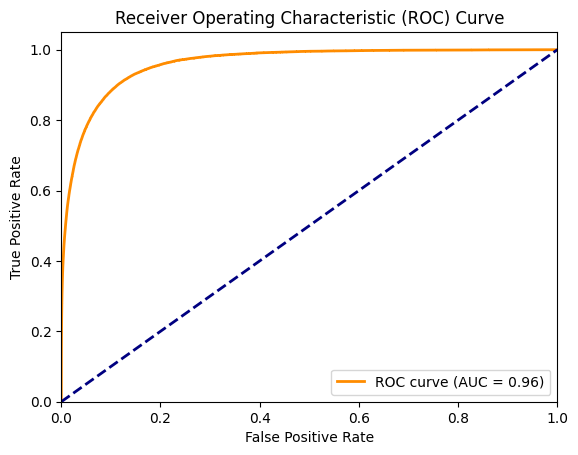

In [ ]:
import matplotlib.pyplot as plt
import os
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, test_dataset, y_true, save_dir, file_name):
    # Previsioni di probabilità sul set di test
    probabilities = model.predict(test_dataset).flatten()

    # Calcolo delle curve ROC e dell'AUC
    fpr, tpr, thresholds = roc_curve(y_true, probabilities)
    roc_auc = auc(fpr, tpr)

    # Tracciamento delle curve ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    # Salva i grafici nella directory specificata
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, file_name))

    plt.show()

# Percorso di salvataggio e nome del file
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati /4'
file_name = 'ROC_QUARTO2.png'

# Chiamata alla funzione per plottare e salvare le curve ROC
plot_roc_curve(model, test_dataset, y_true, save_dir, file_name)

In [ ]:
import matplotlib.pyplot as plt
import os
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, test_dataset, y_true, save_dir, file_name):
    # Previsioni di probabilità sul set di test
    probabilities = model.predict(test_dataset).flatten()

    # Calcolo delle curve ROC e dell'AUC
    fpr, tpr, thresholds = roc_curve(y_true, probabilities)
    roc_auc = auc(fpr, tpr)

    # Tracciamento delle curve ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    # Salva i grafici nella directory specificata
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, file_name))

    plt.show()

# Percorso di salvataggio e nome del file
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati /4'
file_name = 'ROC_QUARTO2222222222222225655656.png'

# Chiamata alla funzione per plottare e salvare le curve ROC
plot_roc_curve(model, test_dataset, y_true, save_dir, file_name)

##CONFUSION MATRIX

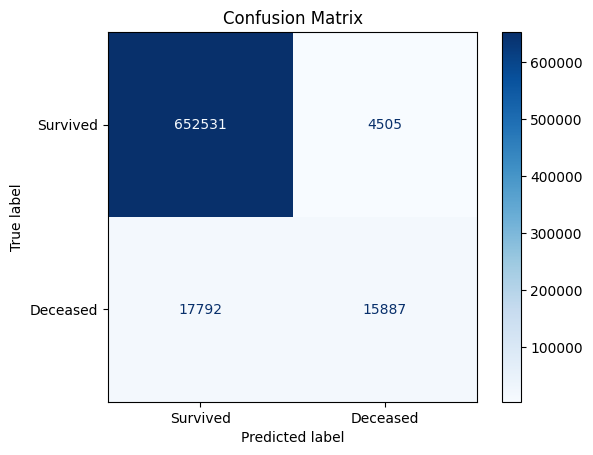

In [ ]:
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def compute_and_plot_confusion_matrix(y_true, y_pred, save_dir, file_name):
    # Calcolo della matrice di confusione
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Survived", "Deceased"])

    # Visualizzazione della matrice di confusione
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title("Confusion Matrix")

    # Salva i grafici nella directory specificata
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, file_name))

    plt.show()

# Percorso di salvataggio e nome del file
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati /4'
file_name = 'Confusion_Matrix_QUARTO.png'

# Eseguo il calcolo e visualizzo la matrice di confusione, salvandola nella directory specificata
compute_and_plot_confusion_matrix(y_true, y_pred, save_dir, file_name)

In [ ]:
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def compute_and_plot_confusion_matrix(y_true, y_pred, save_dir, file_name):
    # Calcolo della matrice di confusione
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Survived", "Deceased"])

    # Visualizzazione della matrice di confusione
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title("Confusion Matrix")

    # Salva i grafici nella directory specificata
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, file_name))

    plt.show()

# Percorso di salvataggio e nome del file
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati /4'
file_name = 'Confusion_Matrix_QUARTO2626589195664.png'

# Eseguo il calcolo e visualizzo la matrice di confusione, salvandola nella directory specificata
compute_and_plot_confusion_matrix(y_true, y_pred, save_dir, file_name)

##PRECISION VS RECALL

21585/21585 ━━━━━━━━━━━━━━━━━━━━ 507s 23ms/step


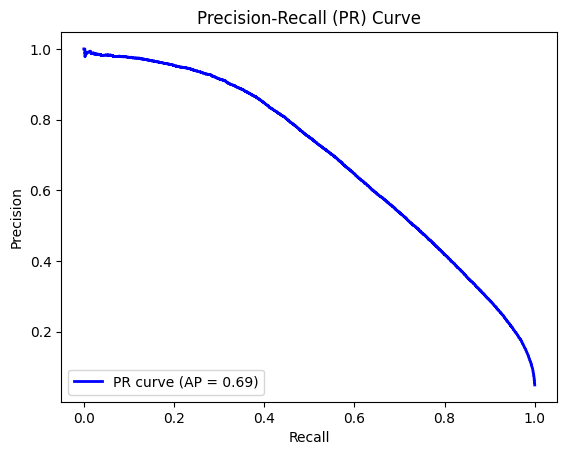

In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curve(model, test_dataset, y_true, save_dir, file_name):
    # Previsioni di probabilità sul set di test
    probabilities = model.predict(test_dataset).flatten()

    # Calcolo delle curve Precision-Recall e dell'AUC
    precision, recall, thresholds = precision_recall_curve(y_true, probabilities)
    average_precision = average_precision_score(y_true, probabilities)

    # Tracciamento delle curve Precision-Recall
    plt.figure()
    plt.plot(recall, precision, color='b', lw=2, label=f'PR curve (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall (PR) Curve')
    plt.legend(loc="lower left")

    # Salva i grafici nella directory specificata
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, file_name))

    plt.show()

# Percorso di salvataggio e nome del file
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati /4'
file_name = 'Precision_Recall_QUARTO.png'

# Chiamata alla funzione per plottare e salvare le curve Precision-Recall
plot_precision_recall_curve(model, test_dataset, y_true, save_dir, file_name)

In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curve(model, test_dataset, y_true, save_dir, file_name):
    # Previsioni di probabilità sul set di test
    probabilities = model.predict(test_dataset).flatten()

    # Calcolo delle curve Precision-Recall e dell'AUC
    precision, recall, thresholds = precision_recall_curve(y_true, probabilities)
    average_precision = average_precision_score(y_true, probabilities)

    # Tracciamento delle curve Precision-Recall
    plt.figure()
    plt.plot(recall, precision, color='b', lw=2, label=f'PR curve (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall (PR) Curve')
    plt.legend(loc="lower left")

    # Salva i grafici nella directory specificata
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, file_name))

    plt.show()

# Percorso di salvataggio e nome del file
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati /4'
file_name = 'Precision_Recall_QUARTO06515816156.png'

# Chiamata alla funzione per plottare e salvare le curve Precision-Recall
plot_precision_recall_curve(model, test_dataset, y_true, save_dir, file_name)

##THRESOLD VS METRICS

21585/21585 ━━━━━━━━━━━━━━━━━━━━ 505s 23ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


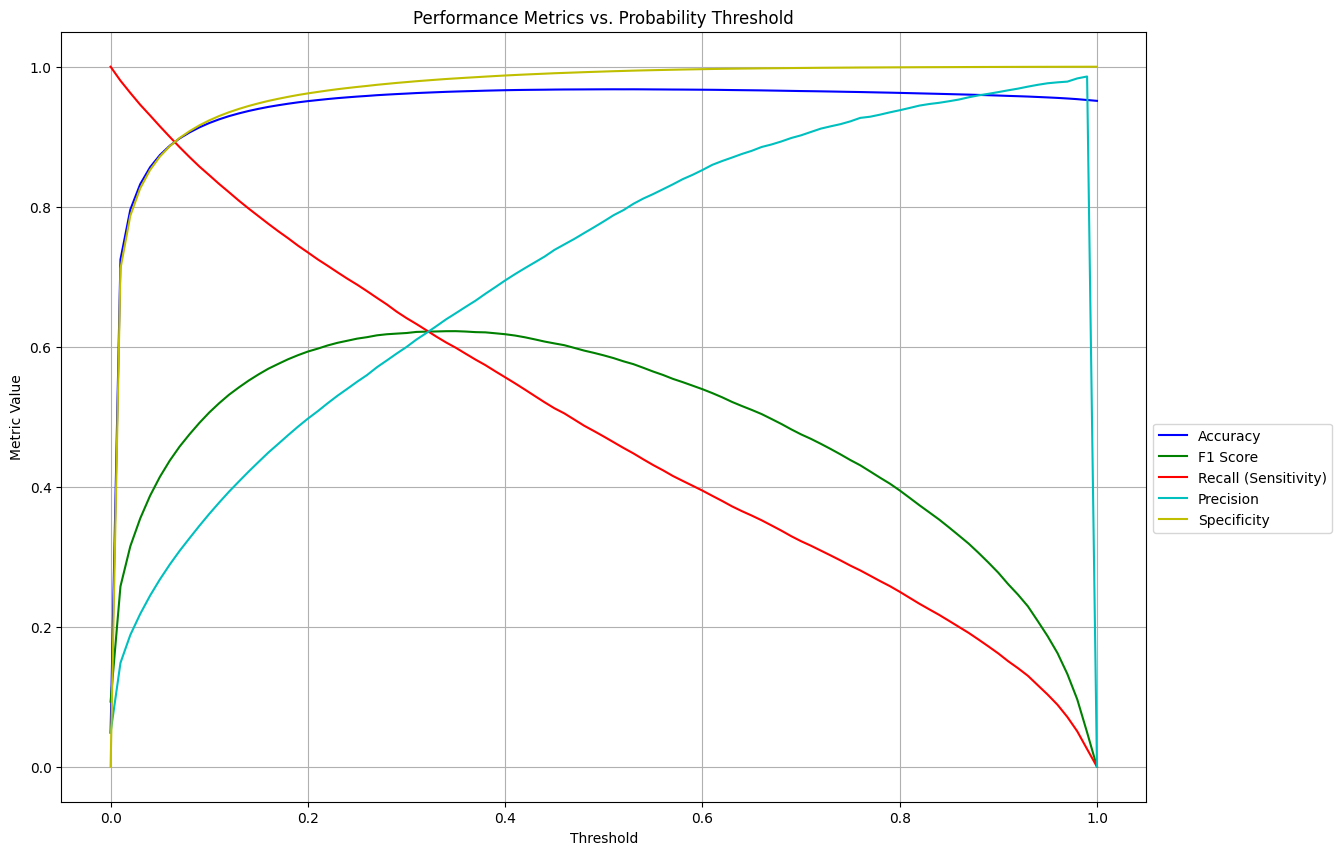

In [ ]:
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_recall_curve, f1_score, recall_score, precision_score
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Funzione per calcolare sensitivity e specificity
def calculate_sensitivity_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)  # Sensitivity = Recall
    specificity = tn / (tn + fp)  # Specificity = True Negative Rate
    return sensitivity, specificity

# Funzione per plottare e salvare le metriche di performance
def plot_performance_metrics(model, test_dataset, y_true, save_dir, file_name):
    # Predizione delle probabilità
    predictions_proba = model.predict(test_dataset)

    # Convertiamo in array flat
    y_pred_prob = predictions_proba.flatten()

    # Inizializzazione delle metriche per ogni threshold
    thresholds = np.linspace(0, 1, 101)
    accuracy = []
    f1_scores = []
    recalls = []
    precisions = []
    specificities = []

    # Calcoliamo le metriche per ogni threshold
    for threshold in thresholds:
        y_pred_bin = (y_pred_prob >= threshold).astype(int)

        # Calcolare precisione, recall, f1-score
        accuracy.append(accuracy_score(y_true, y_pred_bin))
        f1_scores.append(f1_score(y_true, y_pred_bin))
        recalls.append(recall_score(y_true, y_pred_bin))
        precisions.append(precision_score(y_true, y_pred_bin))

        # Calcolare sensitivity e specificity
        _, specificity = calculate_sensitivity_specificity(y_true, y_pred_bin)
        specificities.append(specificity)

    # Creazione del grafico
    plt.figure(figsize=(14, 10))

    plt.plot(thresholds, accuracy, label='Accuracy', color='b')
    plt.plot(thresholds, f1_scores, label='F1 Score', color='g')
    plt.plot(thresholds, recalls, label='Recall (Sensitivity)', color='r')
    plt.plot(thresholds, precisions, label='Precision', color='c')
    plt.plot(thresholds, specificities, label='Specificity', color='y')

    # Modifica posizione della legenda
    plt.xlabel('Threshold')
    plt.ylabel('Metric Value')
    plt.title('Performance Metrics vs. Probability Threshold')

    # Spostamento della legenda a destra nel centro
    plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
    plt.grid(True)

    # Salva i grafici nella directory specificata
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, file_name))

    plt.show()

# Percorso di salvataggio e nome del file
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati /4'
file_name = 'Performance_Metrics_QUARTO.png'

# Chiamata alla funzione per plottare e salvare le metriche di performance
plot_performance_metrics(model, test_dataset, y_true, save_dir, file_name)

In [ ]:
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_recall_curve, f1_score, recall_score, precision_score
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Funzione per calcolare sensitivity e specificity
def calculate_sensitivity_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)  # Sensitivity = Recall
    specificity = tn / (tn + fp)  # Specificity = True Negative Rate
    return sensitivity, specificity

# Funzione per plottare e salvare le metriche di performance
def plot_performance_metrics(model, test_dataset, y_true, save_dir, file_name):
    # Predizione delle probabilità
    predictions_proba = model.predict(test_dataset)

    # Convertiamo in array flat
    y_pred_prob = predictions_proba.flatten()

    # Inizializzazione delle metriche per ogni threshold
    thresholds = np.linspace(0, 1, 101)
    accuracy = []
    f1_scores = []
    recalls = []
    precisions = []
    specificities = []

    # Calcoliamo le metriche per ogni threshold
    for threshold in thresholds:
        y_pred_bin = (y_pred_prob >= threshold).astype(int)

        # Calcolare precisione, recall, f1-score
        accuracy.append(accuracy_score(y_true, y_pred_bin))
        f1_scores.append(f1_score(y_true, y_pred_bin))
        recalls.append(recall_score(y_true, y_pred_bin))
        precisions.append(precision_score(y_true, y_pred_bin))

        # Calcolare sensitivity e specificity
        _, specificity = calculate_sensitivity_specificity(y_true, y_pred_bin)
        specificities.append(specificity)

    # Creazione del grafico
    plt.figure(figsize=(14, 10))

    plt.plot(thresholds, accuracy, label='Accuracy', color='b')
    plt.plot(thresholds, f1_scores, label='F1 Score', color='g')
    plt.plot(thresholds, recalls, label='Recall (Sensitivity)', color='r')
    plt.plot(thresholds, precisions, label='Precision', color='c')
    plt.plot(thresholds, specificities, label='Specificity', color='y')

    # Modifica posizione della legenda
    plt.xlabel('Threshold')
    plt.ylabel('Metric Value')
    plt.title('Performance Metrics vs. Probability Threshold')

    # Spostamento della legenda a destra nel centro
    plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
    plt.grid(True)

    # Salva i grafici nella directory specificata
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, file_name))

    plt.show()

# Percorso di salvataggio e nome del file
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati /4'
file_name = 'Performance_Metrics_QUARTO1861615364.png'

# Chiamata alla funzione per plottare e salvare le metriche di performance
plot_performance_metrics(model, test_dataset, y_true, save_dir, file_name)

### THRESOLD SU VALIDATION DT

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
arbitrary_threshold = 0.275

# Predizioni sul dataset di validazione
predictions_val = model.predict(val_dataset).flatten()

# Applica la soglia arbitraria per determinare le predizioni
y_pred_val = (predictions_val >= arbitrary_threshold).astype(int)

# Calcola i veri valori (y_true) dal dataset di validazione
y_true_val = np.concatenate([y.numpy() for x, y in val_dataset], axis=0)

# Report di classificazione per il dataset di validazione
print(f"Classification Report (Threshold = {arbitrary_threshold}):")
print(classification_report(y_true_val, y_pred_val))

# Calcolo della matrice di confusione
cm = confusion_matrix(y_true_val, y_pred_val)
TP = cm[1, 1]  # Veri Positivi
TN = cm[0, 0]  # Veri Negativi
FP = cm[0, 1]  # Falsi Positivi
FN = cm[1, 0]  # Falsi Negativi

# Calcolo della Sensibilità e Specificità
sensitivity = TP / (TP + FN)  # Sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)  # Specificity = TN / (TN + FP)

# Stampa Sensibilità e Specificità
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


10793/10793 ━━━━━━━━━━━━━━━━━━━━ 253s 23ms/step
Classification Report (Threshold = 0.275):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    328517
           1       0.61      0.63      0.62     16840

    accuracy                           0.96    345357
   macro avg       0.80      0.81      0.80    345357
weighted avg       0.96      0.96      0.96    345357

Sensitivity: 0.6334
Specificity: 0.9795


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
arbitrary_threshold = 0.275

# Predizioni sul dataset di validazione
predictions_val = model.predict(val_dataset).flatten()

# Applica la soglia arbitraria per determinare le predizioni
y_pred_val = (predictions_val >= arbitrary_threshold).astype(int)

# Calcola i veri valori (y_true) dal dataset di validazione
y_true_val = np.concatenate([y.numpy() for x, y in val_dataset], axis=0)

# Report di classificazione per il dataset di validazione
print(f"Classification Report (Threshold = {arbitrary_threshold}):")
print(classification_report(y_true_val, y_pred_val))

# Calcolo della matrice di confusione
cm = confusion_matrix(y_true_val, y_pred_val)
TP = cm[1, 1]  # Veri Positivi
TN = cm[0, 0]  # Veri Negativi
FP = cm[0, 1]  # Falsi Positivi
FN = cm[1, 0]  # Falsi Negativi

# Calcolo della Sensibilità e Specificità
sensitivity = TP / (TP + FN)  # Sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)  # Specificity = TN / (TN + FP)

# Stampa Sensibilità e Specificità
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


##LIME

In [ ]:
pip install lime

#veri positivi

In [ ]:

# Spiegazione delle classificazioni con LIME
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer

# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DEAD'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DEAD'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = true_positives_indices[0]  # Usa il primo vero positivo come esempio
test_text_sample = df.loc[index, 'DIAGNOSI']
test_structured_sample = test_structured[df_test.index.get_loc(index)].reshape(1, -1)
test_label = df.loc[index, 'target']

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=10
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=41
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])

# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DEAD")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DEAD")

# Mostra le spiegazioni nel notebook
graph_text = text_explanation.show_in_notebook(text=True)
graph_structured = structured_explanation.show_in_notebook()

# Specifica il percorso di salvataggio su Google Drive
#text_explanation_path = '/content/drive/My Drive/lime_explanations/lime_text_explanation.html'
#structured_explanation_path = '/content/drive/My Drive/lime_explanations/lime_structured_explanation.html'

# Salva le spiegazioni in formato HTML nel percorso specificato
#text_explanation.save_to_file(text_explanation_path)
#structured_explanation.save_to_file(structured_explanation_path)

IndexError: index 0 is out of bounds for axis 0 with size 0

##SALVATAGGIO SPIEGAZIONI XAI

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Testo campione: malignant neoplasm transverse colon specified intestinal obstruction paralysis agitans cachexia cardiac arrest
Variabili strutturali campione: [[ 20  12   0  77  10 272   1   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   1   0   0   0   1   0   0   0   0   0   0
    0   0   3]]
Classe originale: DEAD
Classe predetta: DEAD


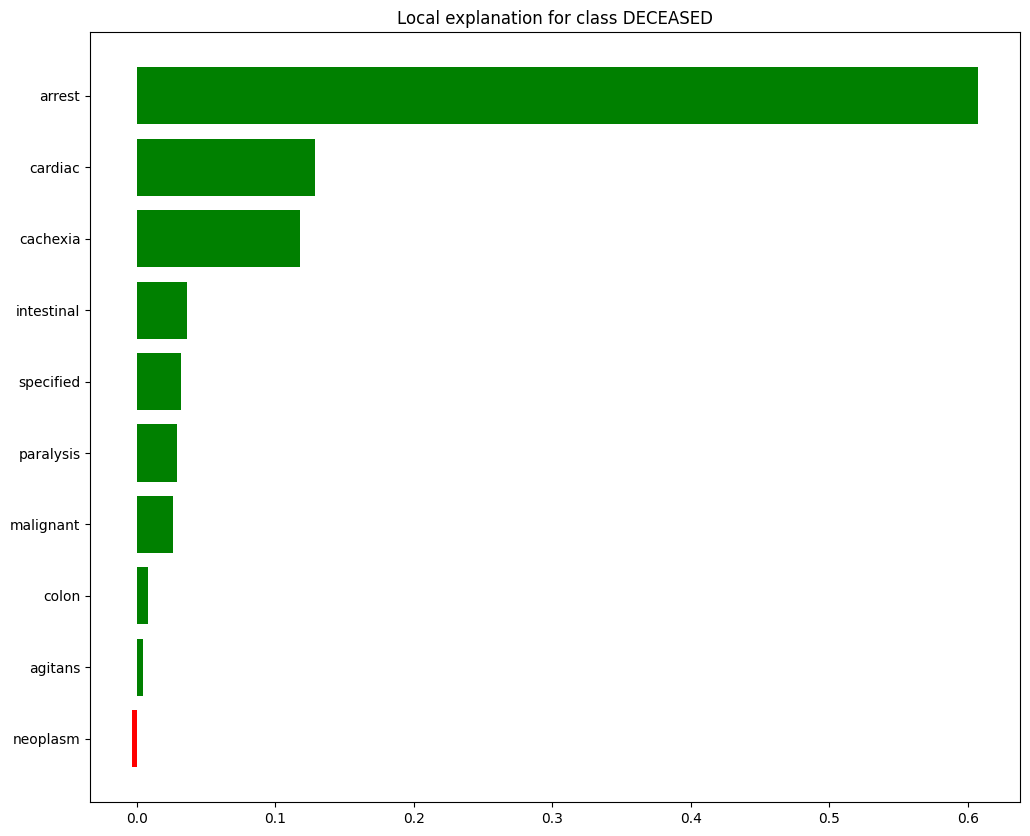

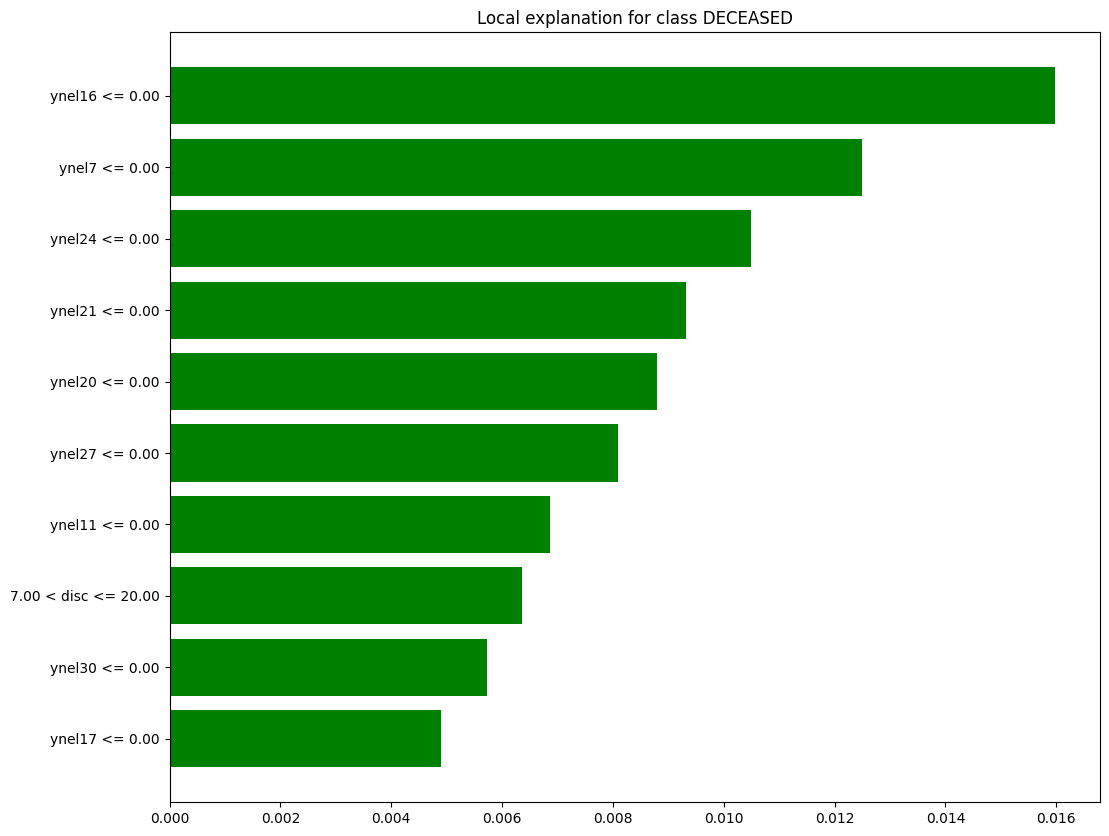

In [ ]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import os
import matplotlib.pyplot as plt

# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DECEASED'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DECEASED'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = true_positives_indices[0]  # Usa il primo vero positivo come esempio
test_text_sample = df.loc[index, 'DIAGNOSI']
test_structured_sample = test_structured[df_test.index.get_loc(index)].reshape(1, -1)
test_label = df.loc[index, 'target']

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=10
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=10
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])

# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DECEASED")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DECEASED")

# Mostra le spiegazioni nel notebook
graph_text = text_explanation.as_pyplot_figure()
graph_structured = structured_explanation.as_pyplot_figure()

# Aumenta le dimensioni delle figure salvate
graph_text.set_size_inches(12, 10)
graph_structured.set_size_inches(12, 10)

# Specifica il percorso di salvataggio su Google Drive
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/4'
text_explanation_path = os.path.join(save_dir, 'lime_text_explanation_QUARTO_VERO_POSITIVO.png')
structured_explanation_path = os.path.join(save_dir, 'lime_structured_explanation_QUARTO_VERO_POSITIVO.png')

# Verifica se il percorso di salvataggio esiste; se non esiste, crealo
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Salva le spiegazioni in formato PNG nel percorso specificato
graph_text.savefig(text_explanation_path)
graph_structured.savefig(structured_explanation_path)

plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Testo campione: subendocardial infarction initial episode care carcinoma situ bronchus lung cardiac arrest
Variabili strutturali campione: [[  6   0   0  68 120 120  58   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   3]]
Classe originale: DECEASED
Classe predetta: DECEASED


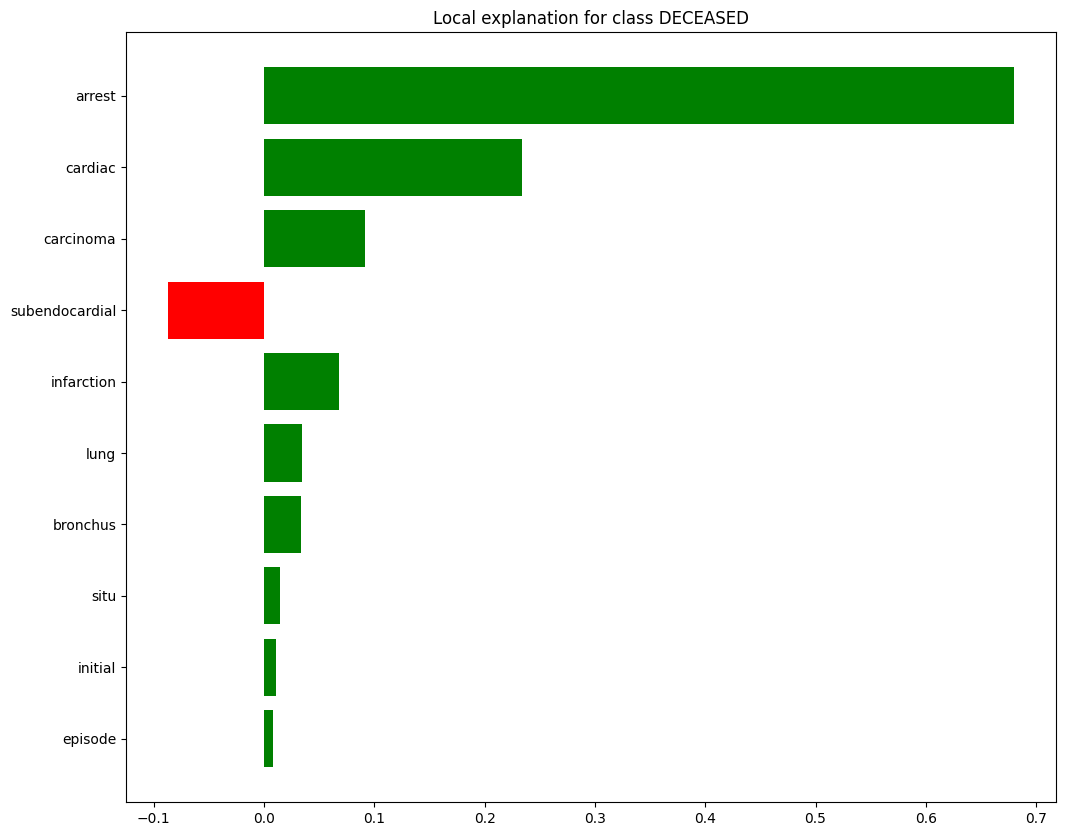

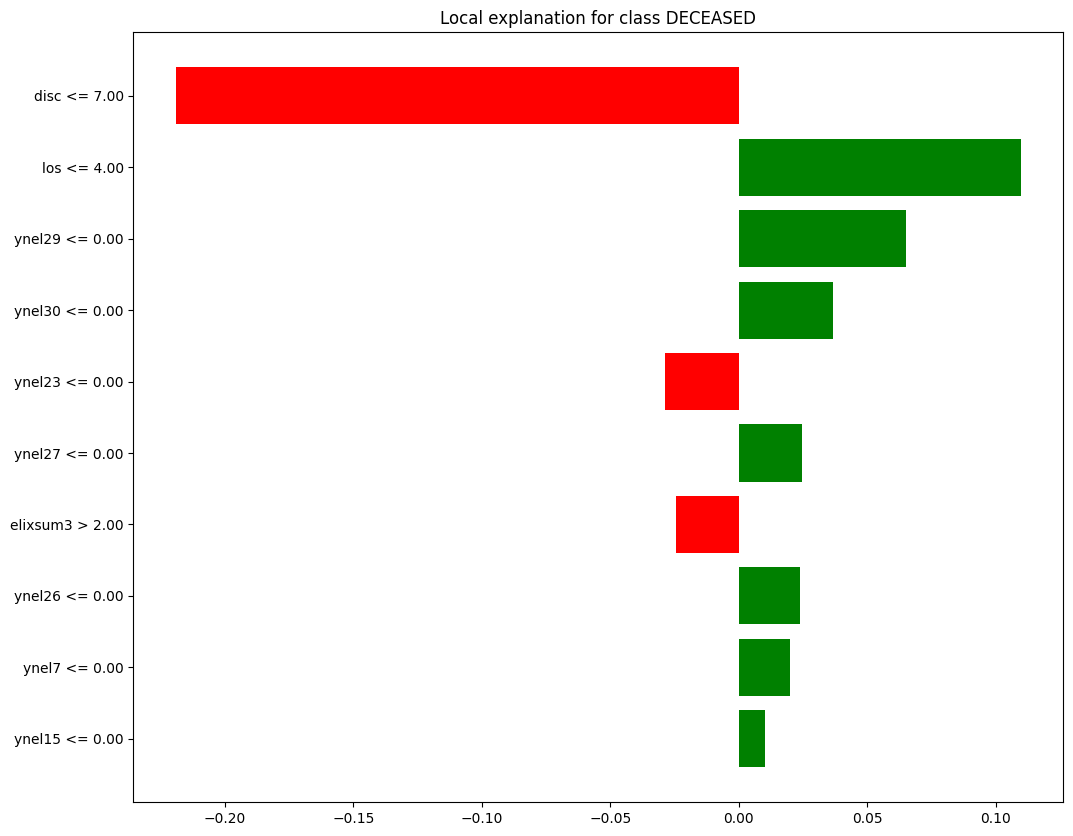

In [ ]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import os
import matplotlib.pyplot as plt

# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DECEASED'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DECEASED'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = true_positives_indices[1999]  # Usa il primo vero positivo come esempio
test_text_sample = df.loc[index, 'DIAGNOSI']
test_structured_sample = test_structured[df_test.index.get_loc(index)].reshape(1, -1)
test_label = df.loc[index, 'target']

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=10
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=10
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])

# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DECEASED")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DECEASED")

# Mostra le spiegazioni nel notebook
graph_text = text_explanation.as_pyplot_figure()
graph_structured = structured_explanation.as_pyplot_figure()

# Aumenta le dimensioni delle figure salvate
graph_text.set_size_inches(12, 10)
graph_structured.set_size_inches(12, 10)

# Specifica il percorso di salvataggio su Google Drive
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/4'
text_explanation_path = os.path.join(save_dir, 'lime_text_explanation_QUARTO_VERO_POSITIVO2.png')
structured_explanation_path = os.path.join(save_dir, 'lime_structured_explanation_QUARTO_VERO_POSITIVO2.png')

# Verifica se il percorso di salvataggio esiste; se non esiste, crealo
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Salva le spiegazioni in formato PNG nel percorso specificato
graph_text.savefig(text_explanation_path)
graph_structured.savefig(structured_explanation_path)

plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Testo campione: grand mal status acute respiratory failure benign essential hypertension malignant neoplasm brain unspecified intracerebral hemorrhage cardiogenic shock
Variabili strutturali campione: [[ 86  13   0  58 120  91  58   0   0   0   0   0   1   0   1   0   0   0
    0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   3]]
Classe originale: DECEASED
Classe predetta: DECEASED


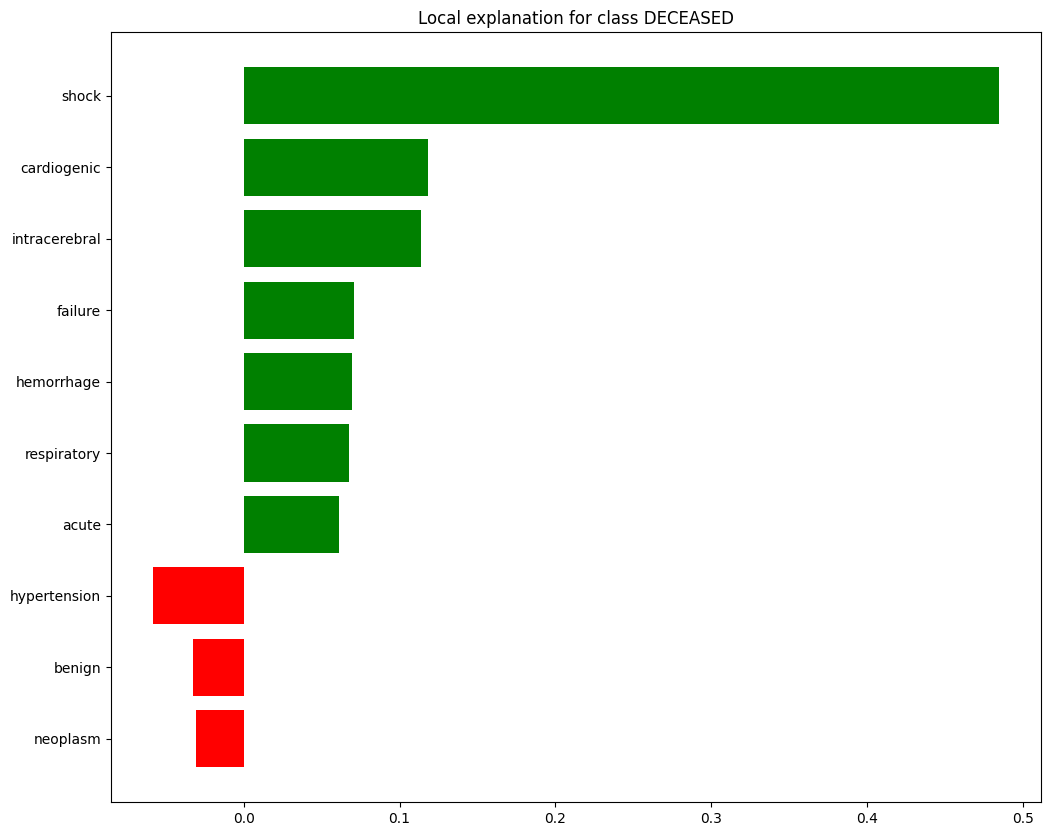

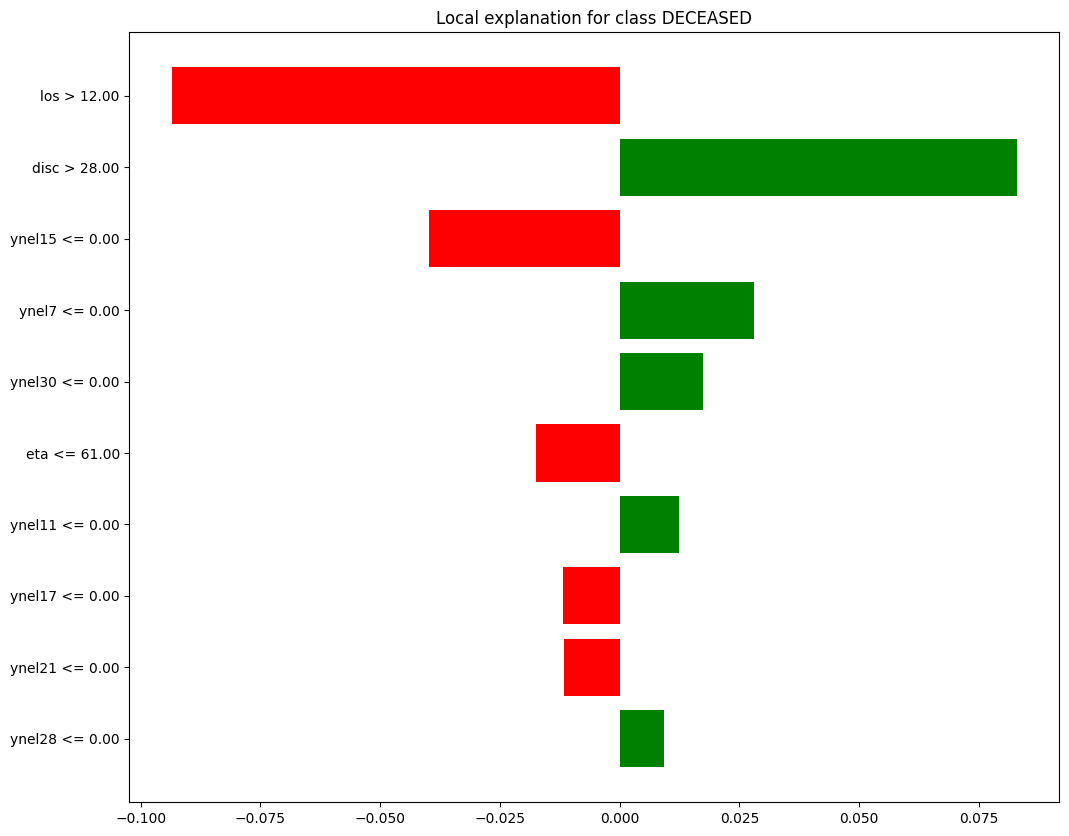

In [ ]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import os
import matplotlib.pyplot as plt

# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DECEASED'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DECEASED'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = true_positives_indices[2003]  # Usa il primo vero positivo come esempio
test_text_sample = df.loc[index, 'DIAGNOSI']
test_structured_sample = test_structured[df_test.index.get_loc(index)].reshape(1, -1)
test_label = df.loc[index, 'target']

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=10
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=10
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])

# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DECEASED")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DECEASED")

# Mostra le spiegazioni nel notebook
graph_text = text_explanation.as_pyplot_figure()
graph_structured = structured_explanation.as_pyplot_figure()

# Aumenta le dimensioni delle figure salvate
graph_text.set_size_inches(12, 10)
graph_structured.set_size_inches(12, 10)

# Specifica il percorso di salvataggio su Google Drive
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/4'
text_explanation_path = os.path.join(save_dir, 'lime_text_explanation_QUARTO_VERO_POSITIVO3.png')
structured_explanation_path = os.path.join(save_dir, 'lime_structured_explanation_QUARTO_VERO_POSITIVO3.png')

# Verifica se il percorso di salvataggio esiste; se non esiste, crealo
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Salva le spiegazioni in formato PNG nel percorso specificato
graph_text.savefig(text_explanation_path)
graph_structured.savefig(structured_explanation_path)

plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Testo campione: specified forms chronic ischemic heart disease acute myocardial infarction inferior wall initial episode care cardiogenic shock
Variabili strutturali campione: [[38  0  0 67 50 84 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
Classe originale: DECEASED
Classe predetta: DECEASED


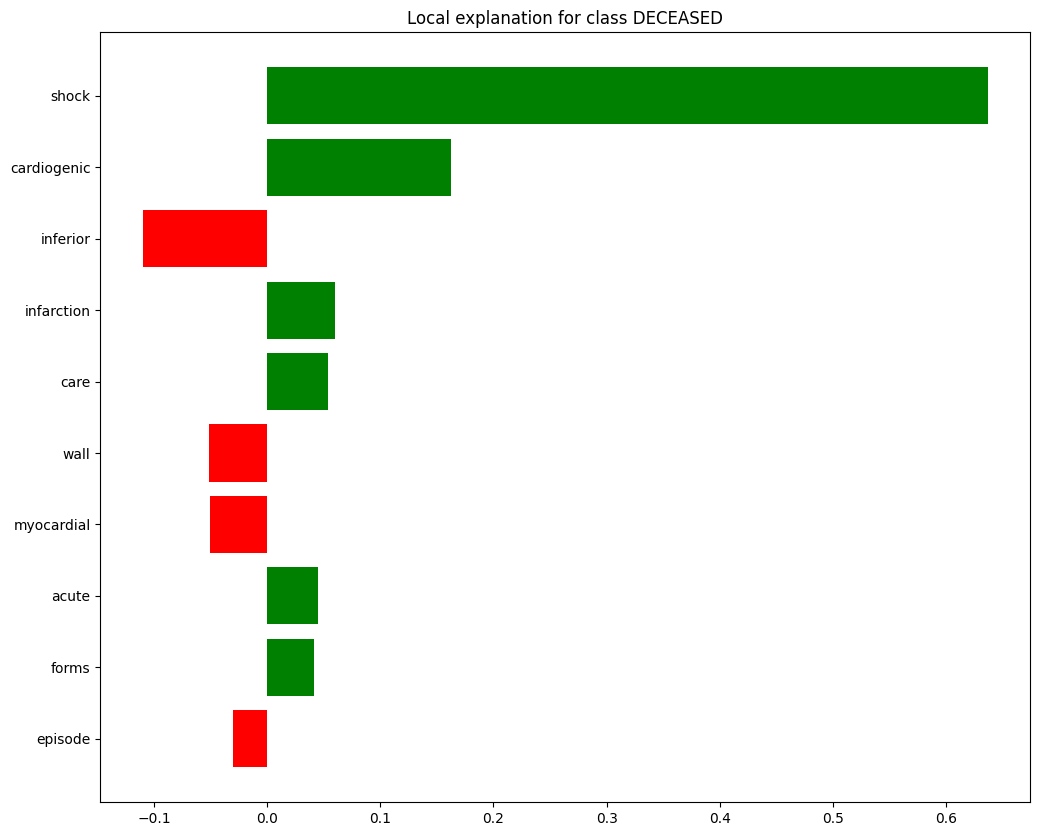

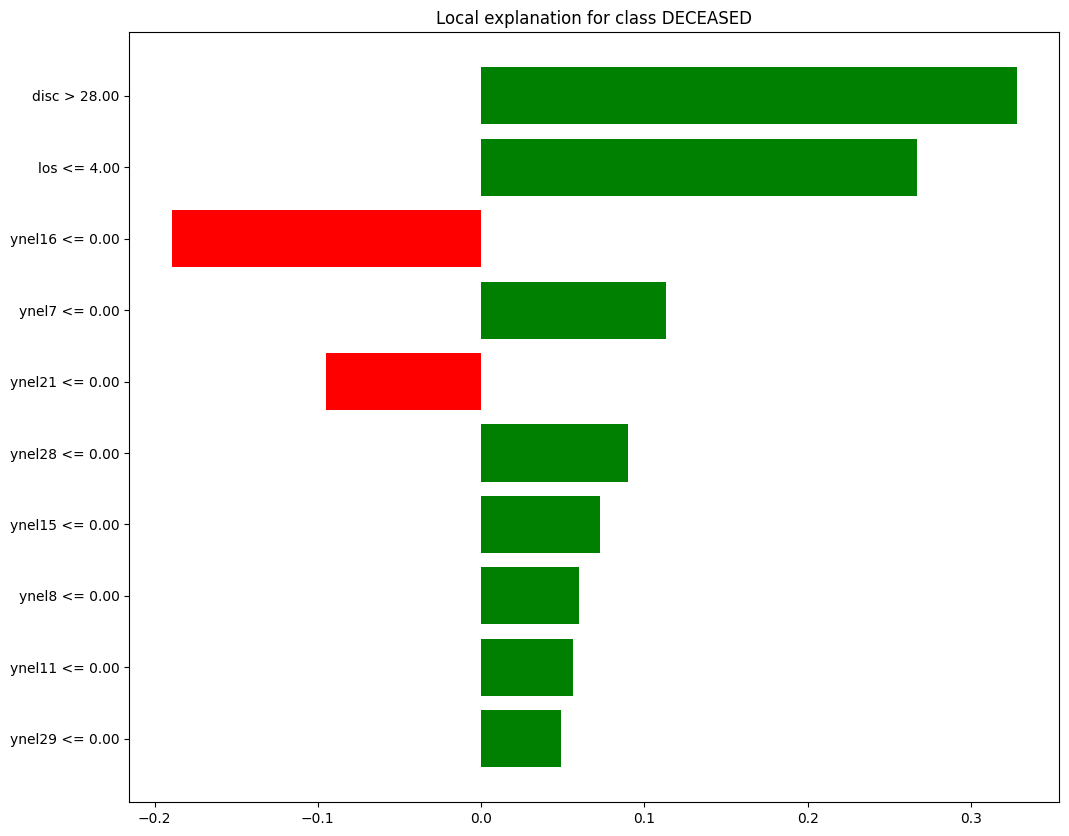

In [ ]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import os
import matplotlib.pyplot as plt

# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DECEASED'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DECEASED'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = true_positives_indices[1998]  # Usa il primo vero positivo come esempio
test_text_sample = df.loc[index, 'DIAGNOSI']
test_structured_sample = test_structured[df_test.index.get_loc(index)].reshape(1, -1)
test_label = df.loc[index, 'target']

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=10
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=10
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])

# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DECEASED")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DECEASED")

# Mostra le spiegazioni nel notebook
graph_text = text_explanation.as_pyplot_figure()
graph_structured = structured_explanation.as_pyplot_figure()

# Aumenta le dimensioni delle figure salvate
graph_text.set_size_inches(12, 10)
graph_structured.set_size_inches(12, 10)

# Specifica il percorso di salvataggio su Google Drive
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/4'
text_explanation_path = os.path.join(save_dir, 'lime_text_explanation_QUARTO_VERO_POSITIVO4.png')
structured_explanation_path = os.path.join(save_dir, 'lime_structured_explanation_QUARTO_VERO_POSITIVO4.png')

# Verifica se il percorso di salvataggio esiste; se non esiste, crealo
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Salva le spiegazioni in formato PNG nel percorso specificato
graph_text.savefig(text_explanation_path)
graph_structured.savefig(structured_explanation_path)

plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Testo campione: acute myocardial infarction anterior wall initial episode care cardiogenic shock cardiac arrest benign essential hypertension
Variabili strutturali campione: [[ 38   0   0  81 110  44  41   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1]]
Classe originale: DECEASED
Classe predetta: DECEASED


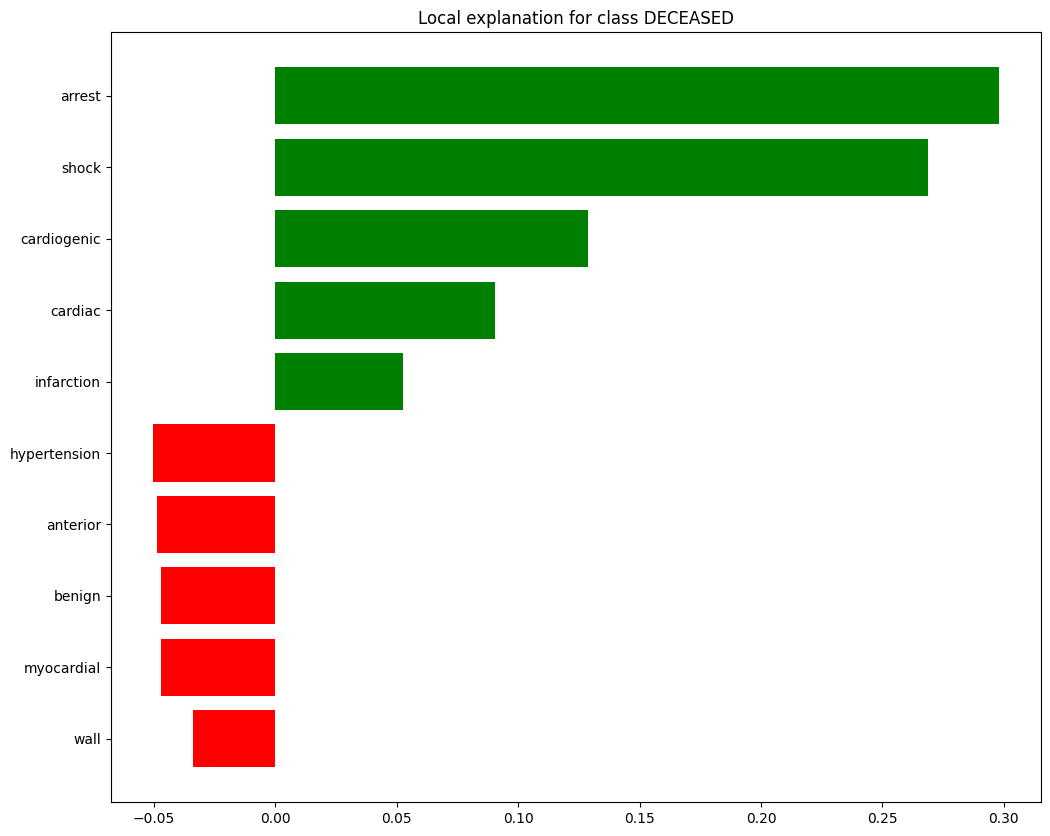

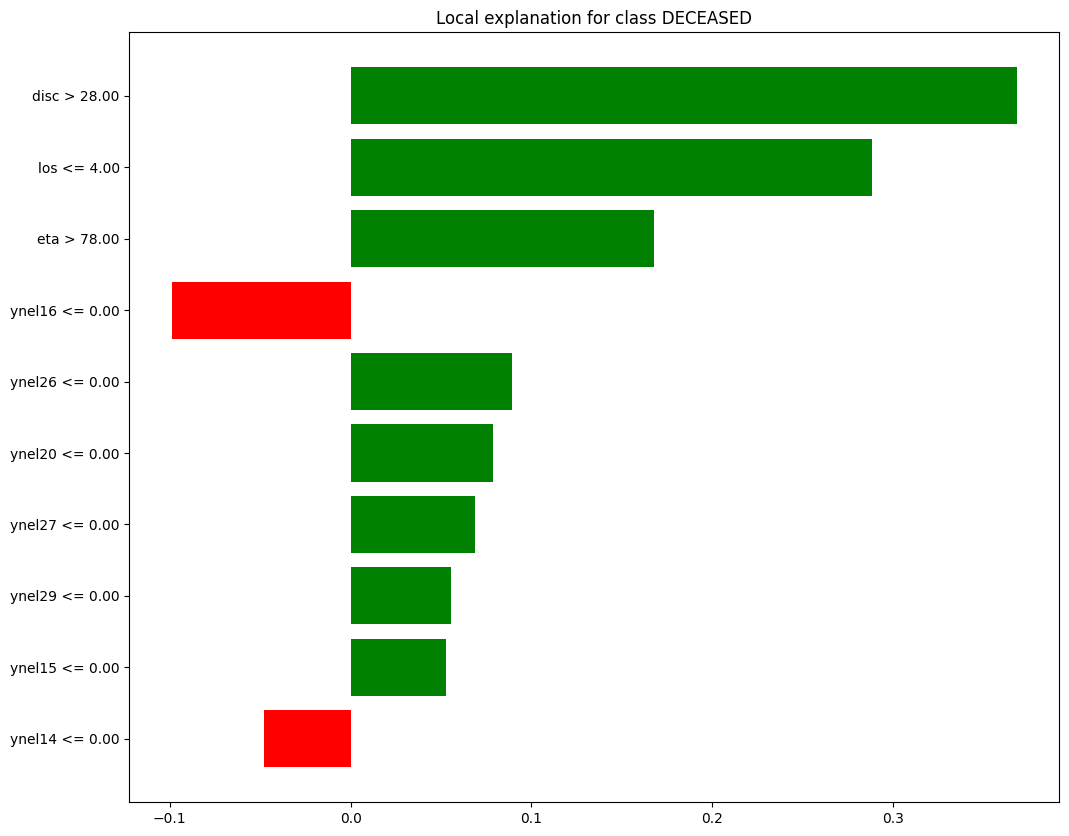

In [ ]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import os
import matplotlib.pyplot as plt

# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DECEASED'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DECEASED'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = true_positives_indices[1963]  # Usa il primo vero positivo come esempio
test_text_sample = df.loc[index, 'DIAGNOSI']
test_structured_sample = test_structured[df_test.index.get_loc(index)].reshape(1, -1)
test_label = df.loc[index, 'target']

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=10
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=10
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])

# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DECEASED")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DECEASED")

# Mostra le spiegazioni nel notebook
graph_text = text_explanation.as_pyplot_figure()
graph_structured = structured_explanation.as_pyplot_figure()

# Aumenta le dimensioni delle figure salvate
graph_text.set_size_inches(12, 10)
graph_structured.set_size_inches(12, 10)

# Specifica il percorso di salvataggio su Google Drive
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/4'
text_explanation_path = os.path.join(save_dir, 'lime_text_explanation_QUARTO_VERO_POSITIVO5.png')
structured_explanation_path = os.path.join(save_dir, 'lime_structured_explanation_QUARTO_VERO_POSITIVO5.png')

# Verifica se il percorso di salvataggio esiste; se non esiste, crealo
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Salva le spiegazioni in formato PNG nel percorso specificato
graph_text.savefig(text_explanation_path)
graph_structured.savefig(structured_explanation_path)

plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Testo campione: malignant neoplasm esophagus unspecified site malignant neoplasm parts bronchus lung cachexia
Variabili strutturali campione: [[ 20   3   1  69  42 196  22   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   0   0   0   1   0   0   0   0   0   0
    0   0   2]]
Classe originale: DECEASED
Classe predetta: DECEASED


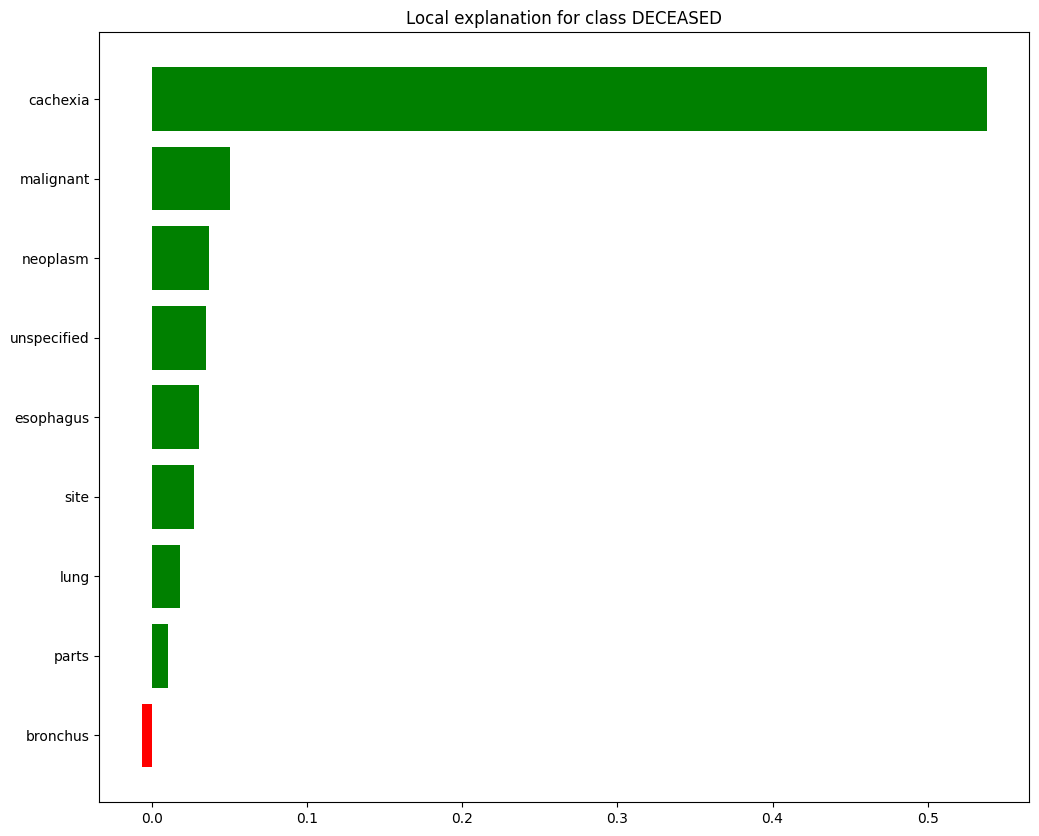

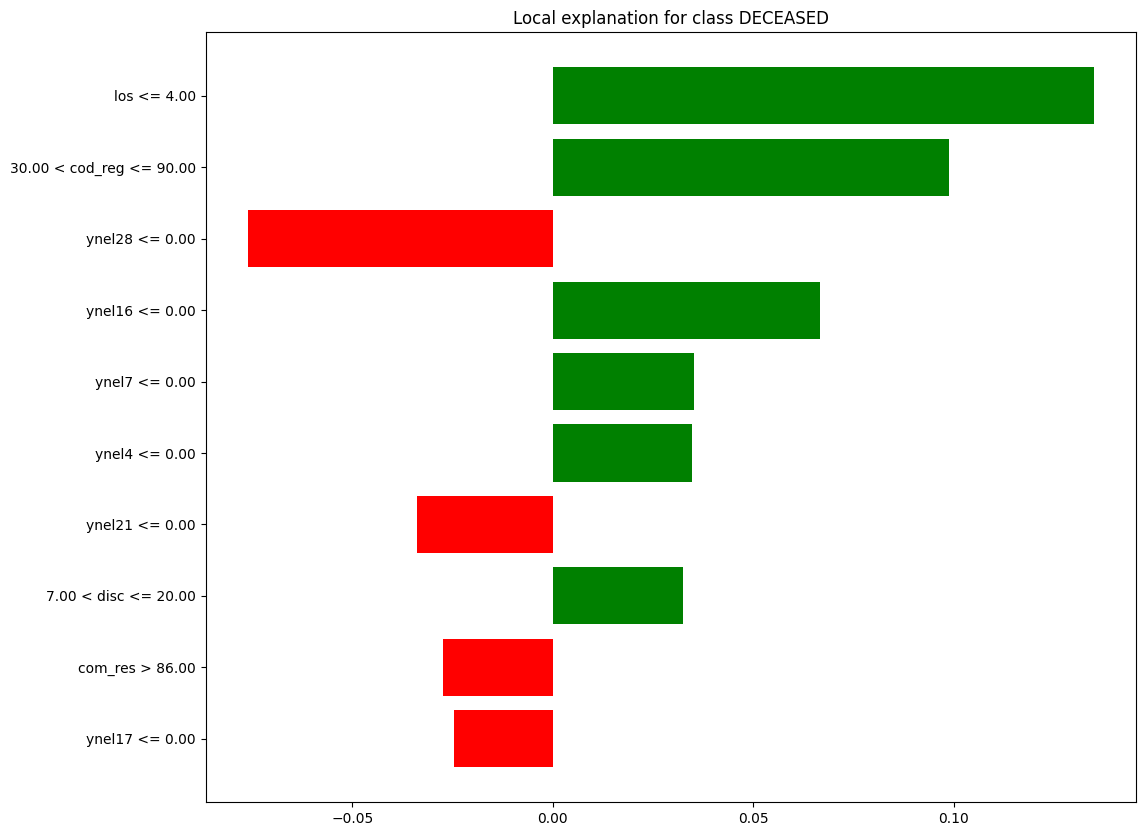

In [ ]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import os
import matplotlib.pyplot as plt

# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DECEASED'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DECEASED'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = true_positives_indices[1968]  # Usa il primo vero positivo come esempio
test_text_sample = df.loc[index, 'DIAGNOSI']
test_structured_sample = test_structured[df_test.index.get_loc(index)].reshape(1, -1)
test_label = df.loc[index, 'target']

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=10
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=10
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])

# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DECEASED")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DECEASED")

# Mostra le spiegazioni nel notebook
graph_text = text_explanation.as_pyplot_figure()
graph_structured = structured_explanation.as_pyplot_figure()

# Aumenta le dimensioni delle figure salvate
graph_text.set_size_inches(12, 10)
graph_structured.set_size_inches(12, 10)

# Specifica il percorso di salvataggio su Google Drive
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/4'
text_explanation_path = os.path.join(save_dir, 'lime_text_explanation_QUARTO_VERO_POSITIVO6.png')
structured_explanation_path = os.path.join(save_dir, 'lime_structured_explanation_QUARTO_VERO_POSITIVO6.png')

# Verifica se il percorso di salvataggio esiste; se non esiste, crealo
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Salva le spiegazioni in formato PNG nel percorso specificato
graph_text.savefig(text_explanation_path)
graph_structured.savefig(structured_explanation_path)

plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Testo campione: unspecified intestinal obstruction unspecified septicemia acute kidney failure unspecified
Variabili strutturali campione: [[ 37  39   1  77 150  49  63   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]]
Classe originale: DECEASED
Classe predetta: DECEASED


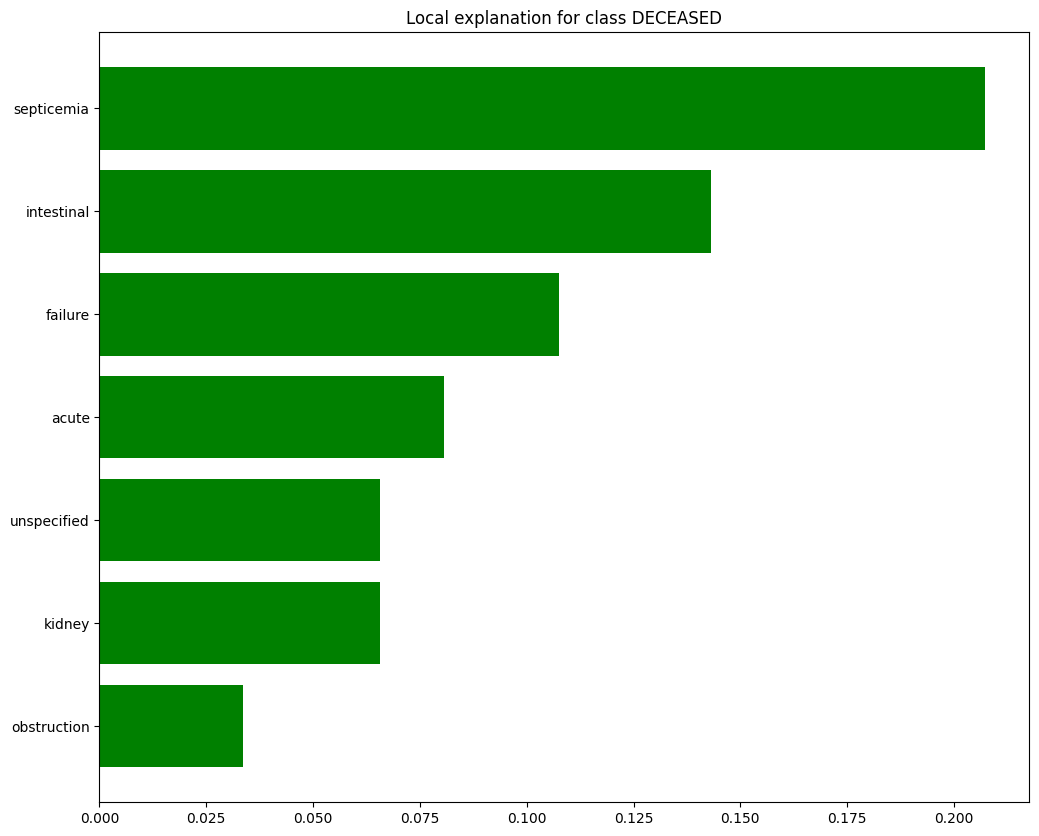

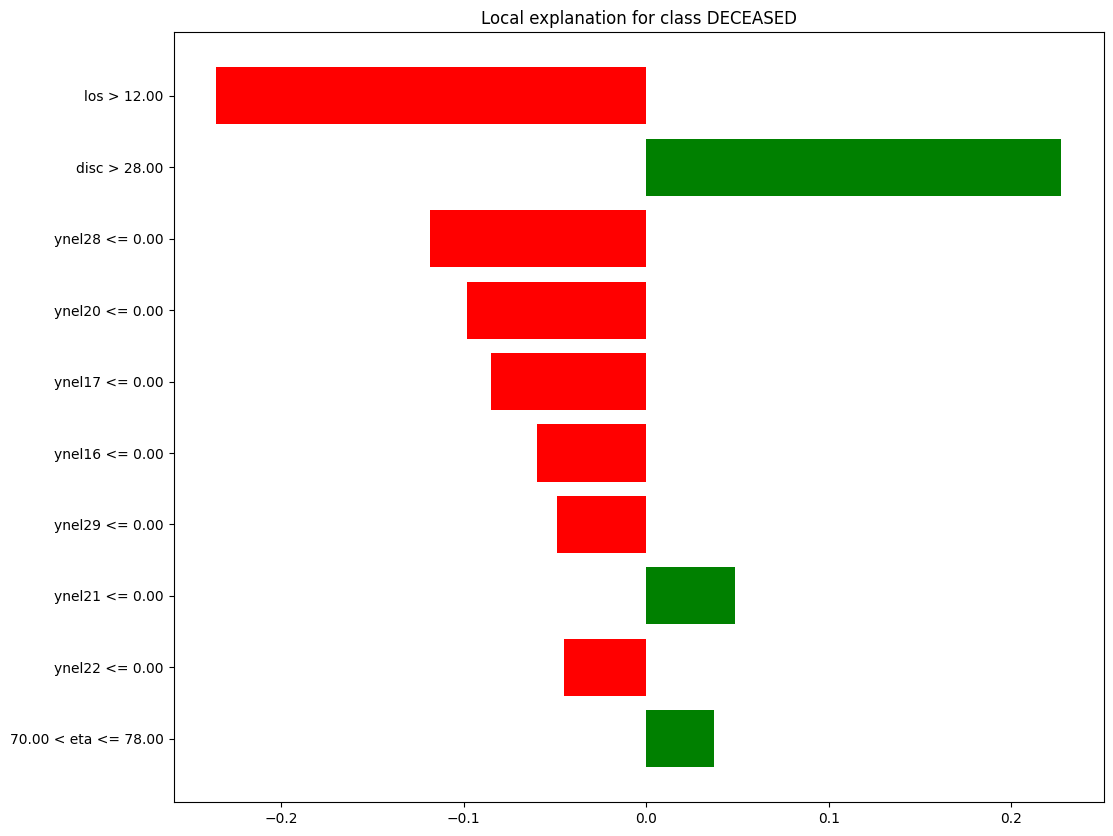

In [ ]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import os
import matplotlib.pyplot as plt

# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DECEASED'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DECEASED'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = true_positives_indices[14000]  # Usa il primo vero positivo come esempio
test_text_sample = df.loc[index, 'DIAGNOSI']
test_structured_sample = test_structured[df_test.index.get_loc(index)].reshape(1, -1)
test_label = df.loc[index, 'target']

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=10
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=10
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])

# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DECEASED")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DECEASED")

# Mostra le spiegazioni nel notebook
graph_text = text_explanation.as_pyplot_figure()
graph_structured = structured_explanation.as_pyplot_figure()

# Aumenta le dimensioni delle figure salvate
graph_text.set_size_inches(12, 10)
graph_structured.set_size_inches(12, 10)

# Specifica il percorso di salvataggio su Google Drive
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/4'
text_explanation_path = os.path.join(save_dir, 'lime_text_explanation_QUARTO_VERO_POSITIVO7.png')
structured_explanation_path = os.path.join(save_dir, 'lime_structured_explanation_QUARTO_VERO_POSITIVO7.png')

# Verifica se il percorso di salvataggio esiste; se non esiste, crealo
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Salva le spiegazioni in formato PNG nel percorso specificato
graph_text.savefig(text_explanation_path)
graph_structured.savefig(structured_explanation_path)

plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Testo campione: septic shock suppurative peritonitis acute vascular insufficiency intestine cardiac arrest
Variabili strutturali campione: [[  7   7   0  82 180  35  78   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]]
Classe originale: DECEASED
Classe predetta: DECEASED


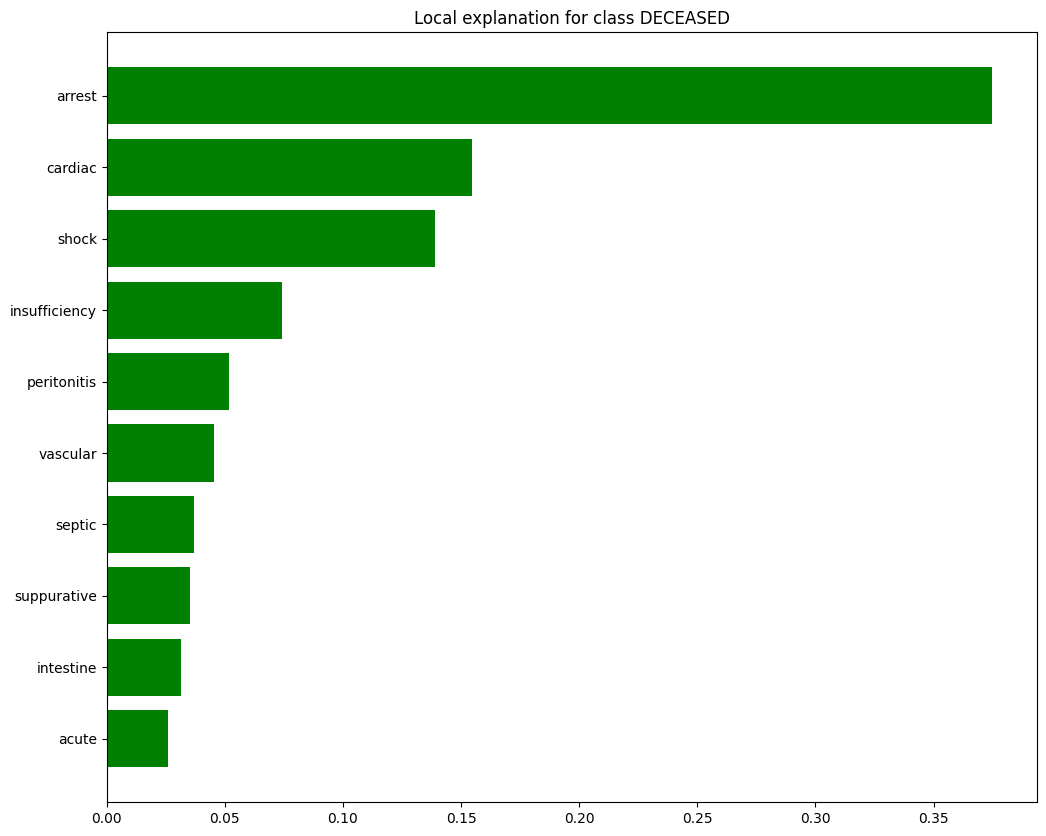

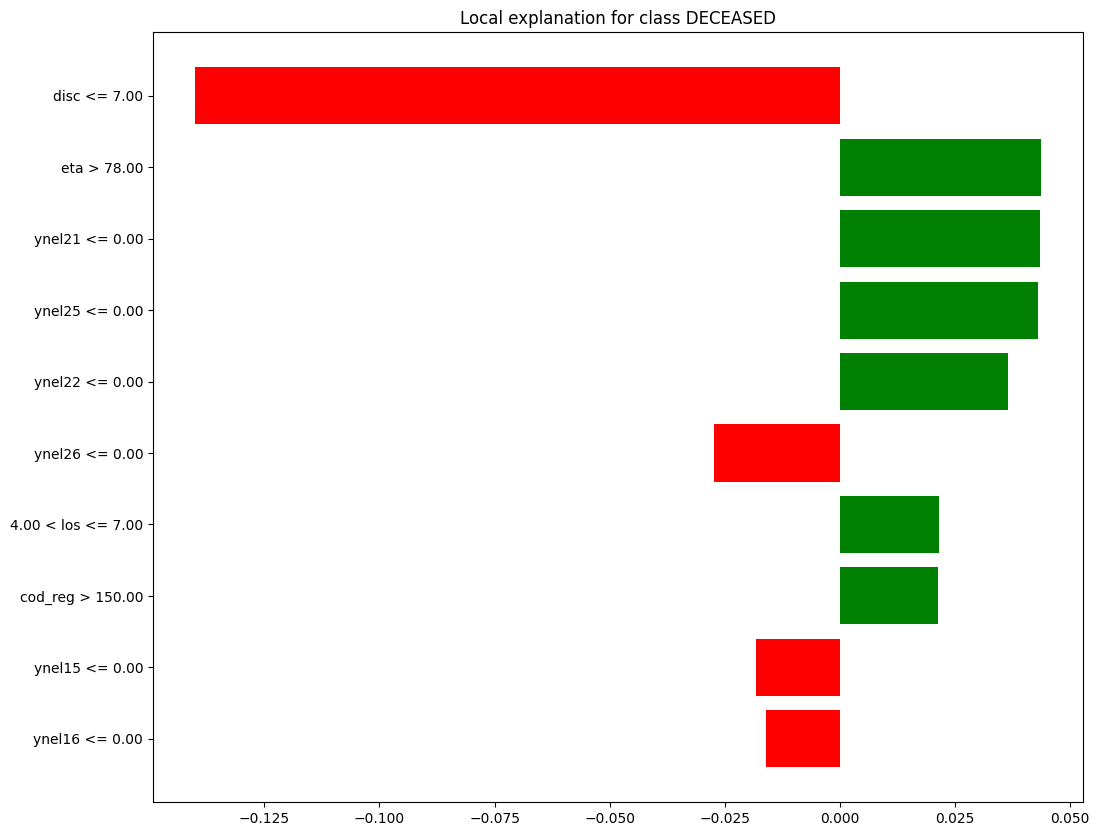

In [ ]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import os
import matplotlib.pyplot as plt

# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DECEASED'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DECEASED'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = true_positives_indices[15000]  # Usa il primo vero positivo come esempio
test_text_sample = df.loc[index, 'DIAGNOSI']
test_structured_sample = test_structured[df_test.index.get_loc(index)].reshape(1, -1)
test_label = df.loc[index, 'target']

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=10
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=10
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])

# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DECEASED")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DECEASED")

# Mostra le spiegazioni nel notebook
graph_text = text_explanation.as_pyplot_figure()
graph_structured = structured_explanation.as_pyplot_figure()

# Aumenta le dimensioni delle figure salvate
graph_text.set_size_inches(12, 10)
graph_structured.set_size_inches(12, 10)

# Specifica il percorso di salvataggio su Google Drive
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/4'
text_explanation_path = os.path.join(save_dir, 'lime_text_explanation_QUARTO_VERO_POSITIVO8.png')
structured_explanation_path = os.path.join(save_dir, 'lime_structured_explanation_QUARTO_VERO_POSITIVO8.png')

# Verifica se il percorso di salvataggio esiste; se non esiste, crealo
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Salva le spiegazioni in formato PNG nel percorso specificato
graph_text.savefig(text_explanation_path)
graph_structured.savefig(structured_explanation_path)

plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Testo campione: cirrhosis liver without mention alcohol acute respiratory failure cardiogenic shock
Variabili strutturali campione: [[ 37   2   0  60 150   6  63   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1]]
Classe originale: DECEASED
Classe predetta: DECEASED


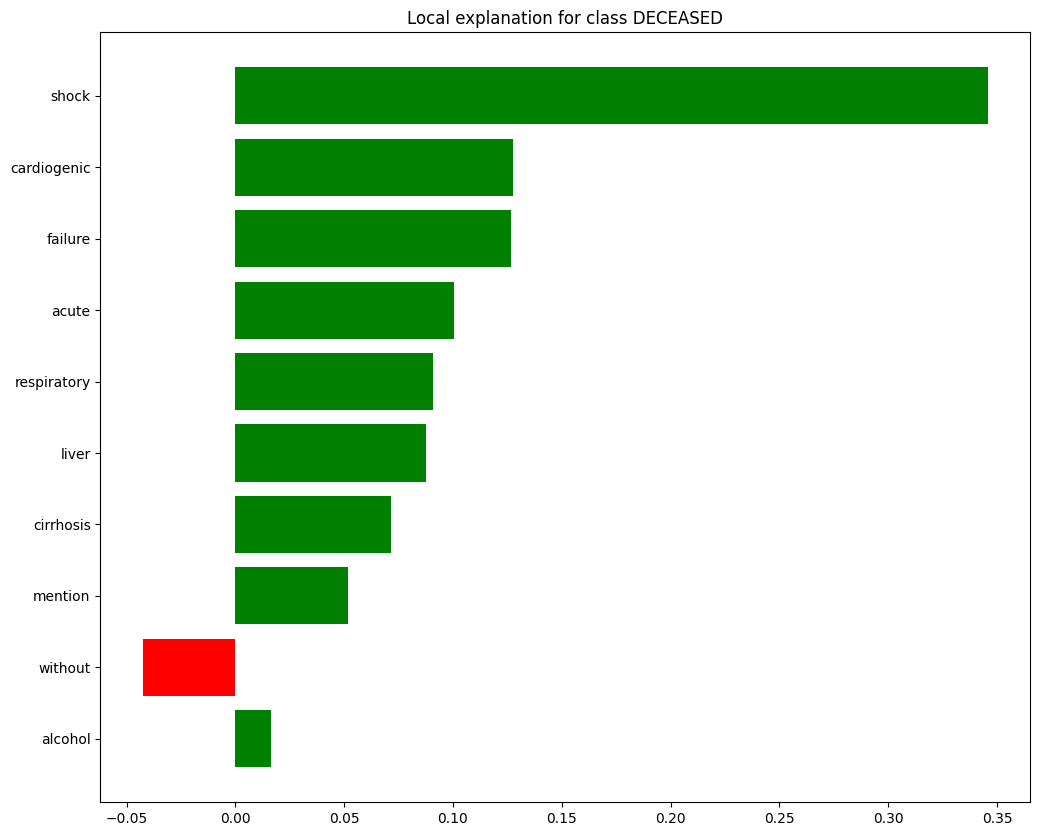

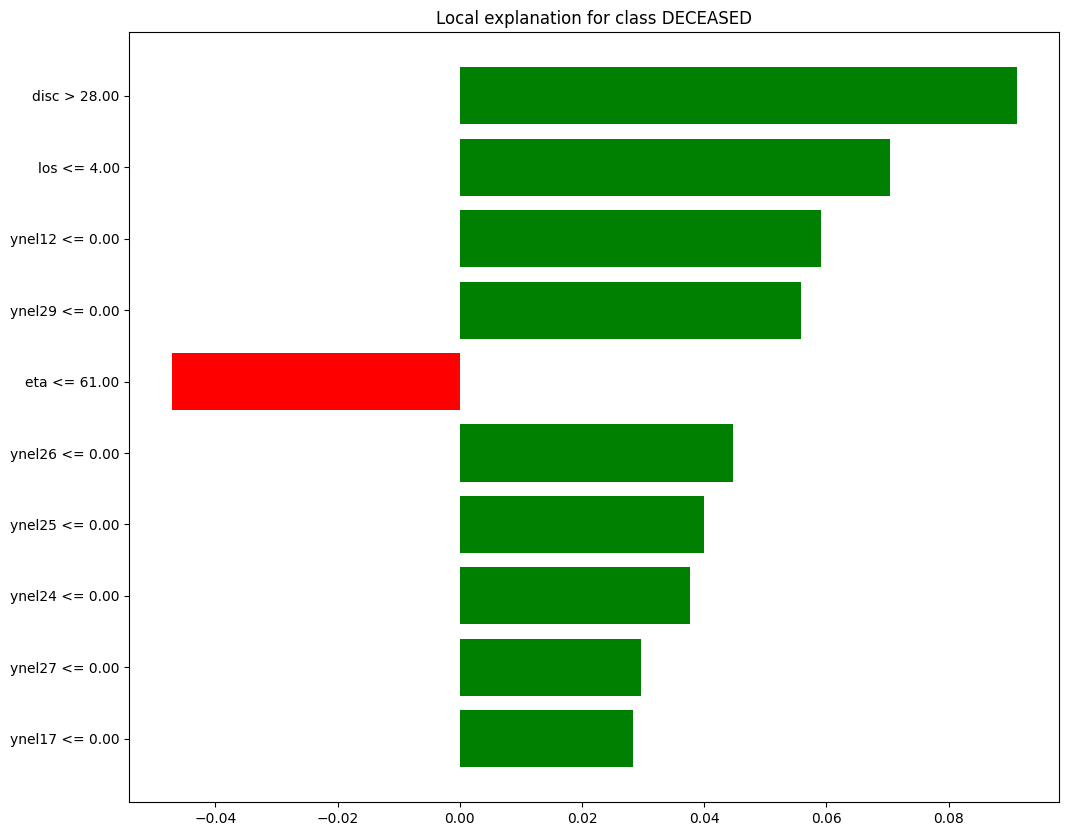

In [ ]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import os
import matplotlib.pyplot as plt

# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DECEASED'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DECEASED'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = true_positives_indices[15886]  # Usa il primo vero positivo come esempio
test_text_sample = df.loc[index, 'DIAGNOSI']
test_structured_sample = test_structured[df_test.index.get_loc(index)].reshape(1, -1)
test_label = df.loc[index, 'target']

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=10
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=10
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])

# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DECEASED")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DECEASED")

# Mostra le spiegazioni nel notebook
graph_text = text_explanation.as_pyplot_figure()
graph_structured = structured_explanation.as_pyplot_figure()

# Aumenta le dimensioni delle figure salvate
graph_text.set_size_inches(12, 10)
graph_structured.set_size_inches(12, 10)

# Specifica il percorso di salvataggio su Google Drive
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/4'
text_explanation_path = os.path.join(save_dir, 'lime_text_explanation_QUARTO_VERO_POSITIVO9.png')
structured_explanation_path = os.path.join(save_dir, 'lime_structured_explanation_QUARTO_VERO_POSITIVO9.png')

# Verifica se il percorso di salvataggio esiste; se non esiste, crealo
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Salva le spiegazioni in formato PNG nel percorso specificato
graph_text.savefig(text_explanation_path)
graph_structured.savefig(structured_explanation_path)

plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Testo campione: closed fracture trochanteric section neck femur dislocation prosthetic joint cardiac arrest acute respiratory failure pulmonary embolism infarction unspecified cerebrovascular disease
Variabili strutturali campione: [[ 28  10   1  72 150  30  63   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1]]
Classe originale: DECEASED
Classe predetta: DECEASED


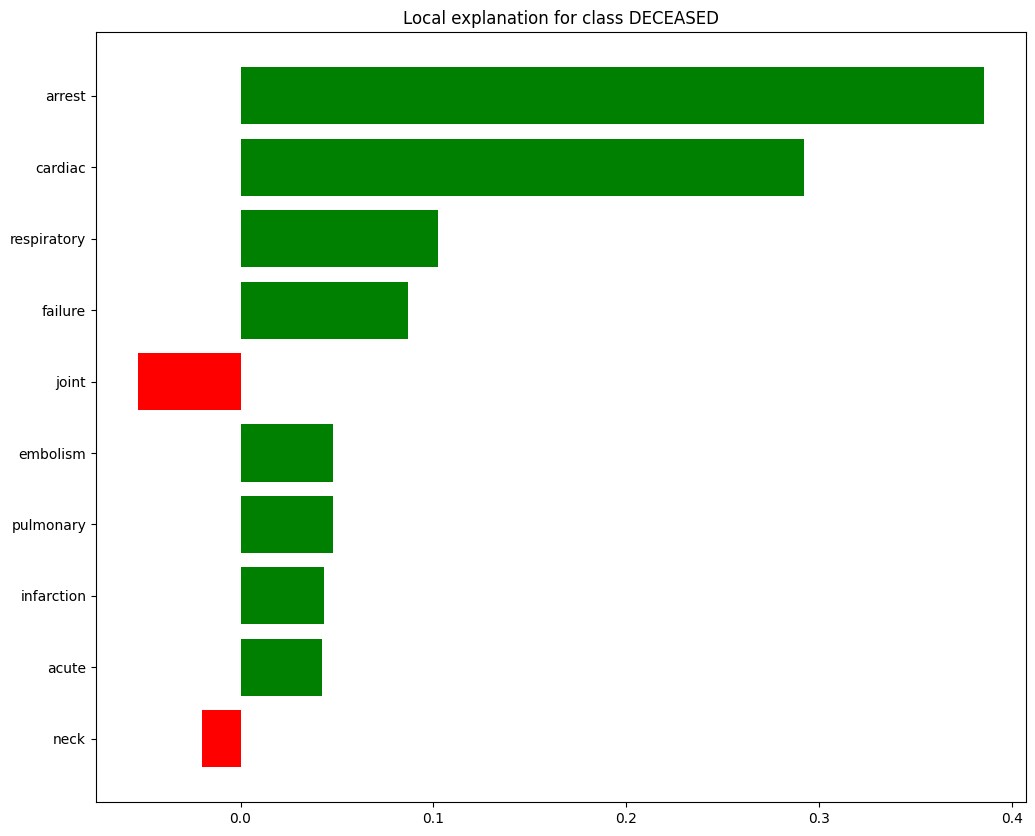

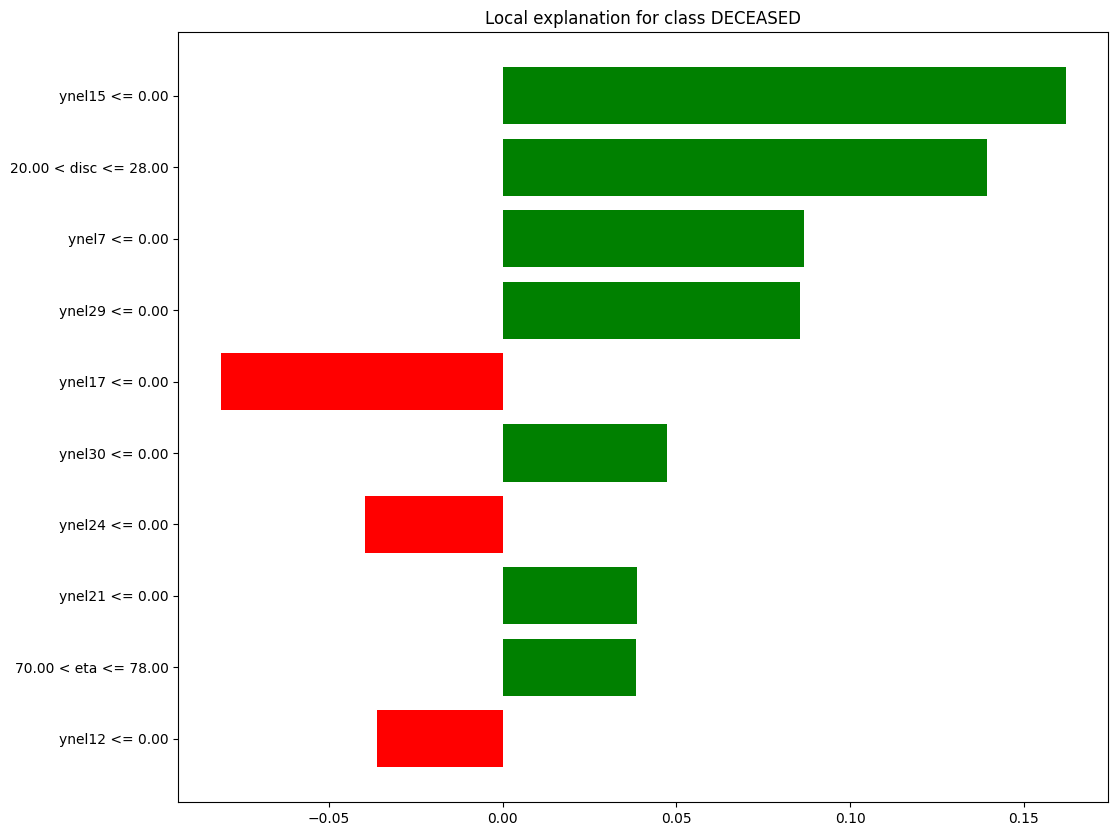

In [ ]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import os
import matplotlib.pyplot as plt

# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DECEASED'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DECEASED'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = true_positives_indices[1000]  # Usa il primo vero positivo come esempio
test_text_sample = df.loc[index, 'DIAGNOSI']
test_structured_sample = test_structured[df_test.index.get_loc(index)].reshape(1, -1)
test_label = df.loc[index, 'target']

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=10
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=10
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])

# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DECEASED")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DECEASED")

# Mostra le spiegazioni nel notebook
graph_text = text_explanation.as_pyplot_figure()
graph_structured = structured_explanation.as_pyplot_figure()

# Aumenta le dimensioni delle figure salvate
graph_text.set_size_inches(12, 10)
graph_structured.set_size_inches(12, 10)

# Specifica il percorso di salvataggio su Google Drive
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/4'
text_explanation_path = os.path.join(save_dir, 'lime_text_explanation_QUARTO_VERO_POSITIVO10.png')
structured_explanation_path = os.path.join(save_dir, 'lime_structured_explanation_QUARTO_VERO_POSITIVO10.png')

# Verifica se il percorso di salvataggio esiste; se non esiste, crealo
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Salva le spiegazioni in formato PNG nel percorso specificato
graph_text.savefig(text_explanation_path)
graph_structured.savefig(structured_explanation_path)

plt.show()


##VERI NEGATIVI

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import numpy as np
import pandas as pd

# Monta Google Drive


# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DEAD'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DEAD'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = 2003
test_text_sample = df['DIAGNOSI'].iloc[index]
test_structured_sample = test_structured[index].reshape(1, -1)
test_label = y.iloc[index]

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=15
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=41
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])


# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DEAD")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DEAD")



# Mostra le spiegazioni nel notebook
graph_text = text_explanation.show_in_notebook(text=True)
graph_structured = structured_explanation.show_in_notebook()


# Specifica il percorso di salvataggio su Google Drive
#text_explanation_path = '/content/drive/My Drive/lime_explanations/lime_text_explanation.html'
#structured_explanation_path = '/content/drive/My Drive/lime_explanations/lime_structured_explanation.html'

# Salva le spiegazioni in formato HTML nel percorso specificato
#text_explanation.save_to_file(text_explanation_path)
#structured_explanation.save_to_file(structured_explanation_path)

##salvataggio spiegazione xai


In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import numpy as np
import pandas as pd
import os

# Monta Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DEAD'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DEAD'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = 15
test_text_sample = df['DIAGNOSI'].iloc[index]
test_structured_sample = test_structured[index].reshape(1, -1)
test_label = y.iloc[index]

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=15
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=41
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])

# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DEAD")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DEAD")

# Mostra le spiegazioni nel notebook
graph_text = text_explanation.show_in_notebook(text=True)
graph_structured = structured_explanation.show_in_notebook()

# Specifica il percorso di salvataggio su Google Drive
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati /4'
text_explanation_path = os.path.join(save_dir, 'lime_text_explanation.html')
structured_explanation_path = os.path.join(save_dir, 'lime_structured_explanation.html')

# Salva le spiegazioni in formato HTML nel percorso specificato
text_explanation.save_to_file(text_explanation_path)
structured_explanation.save_to_file(structured_explanation_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
157/157 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 498s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Testo campione: malignant neoplasm of breast female unspecified
Variabili strutturali campione: [[51 33  0 71 30 62 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  1  0  0  0  0  0  0  0  0  0  0  0  0  2]]
Classe originale: SURVIVED
Classe predetta: SURVIVED


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Testo campione: acute myocardial infarction inferior wall initial episode care left heart failure percutaneous transluminal coronary angioplasty status old myocardial infarction carcinoma situ bronchus lung
Variabili strutturali campione: [[ 6  1  0 79 80  6 37  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]]
Classe originale: SURVIVED
Classe predetta: SURVIVED


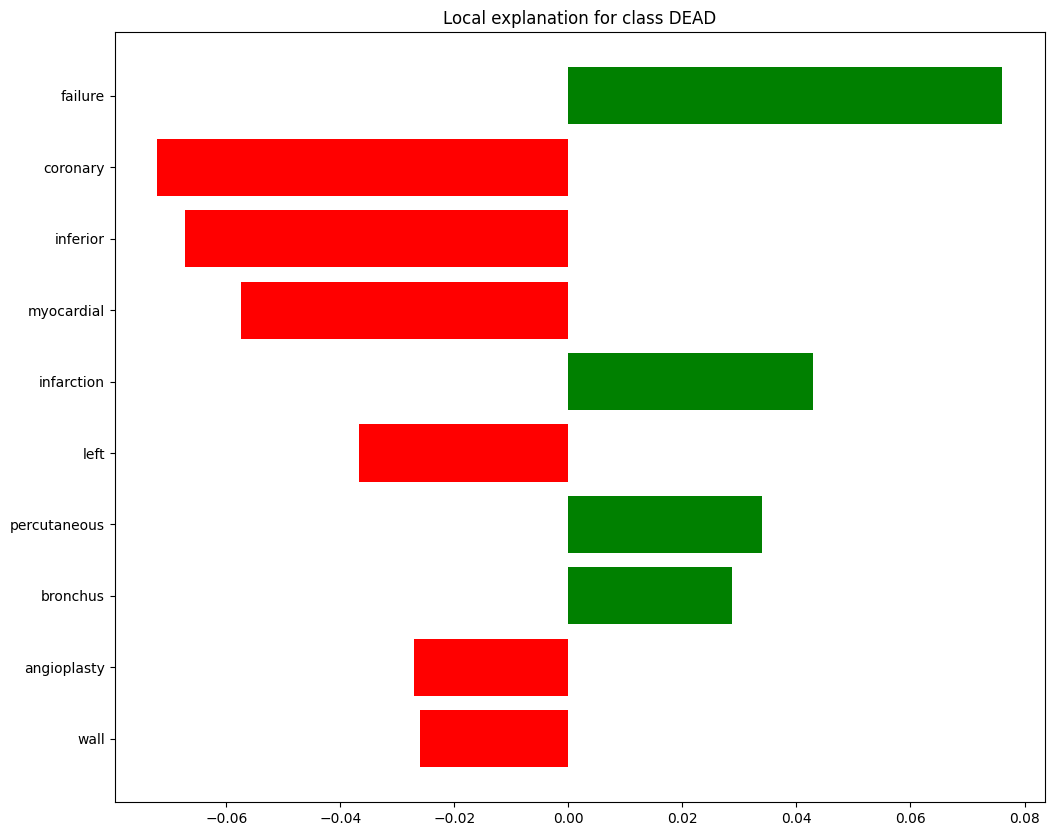

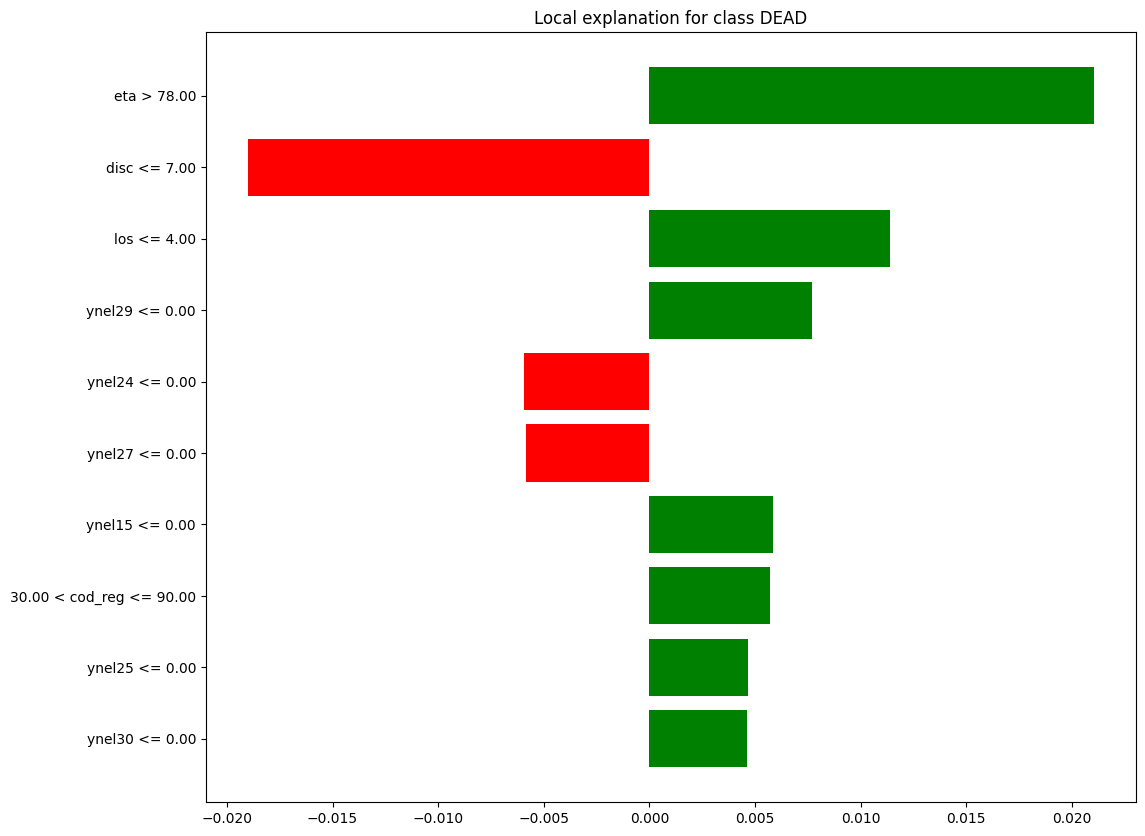

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Monta Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DECEASED'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DECEASED'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = 15
test_text_sample = df['DIAGNOSI'].iloc[index]
test_structured_sample = test_structured[index].reshape(1, -1)
test_label = y.iloc[index]

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=10
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=10
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])

# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DECEASED")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DECEASED")

# Mostra le spiegazioni nel notebook
graph_text = text_explanation.as_pyplot_figure()
graph_structured = structured_explanation.as_pyplot_figure()


# Aumenta le dimensioni delle figure salvate
graph_text.set_size_inches(12, 10)
graph_structured.set_size_inches(12, 10)

# Specifica il percorso di salvataggio su Google Drive
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati /4'
text_explanation_path = os.path.join(save_dir, 'lime_text_explanation_VERO_NEGATIVO.png')
structured_explanation_path = os.path.join(save_dir, 'lime_structured_explanation_VERO_NEGATIVO.png')

# Salva le spiegazioni in formato PNG nel percorso specificato
graph_text.savefig(text_explanation_path)
graph_structured.savefig(structured_explanation_path)

plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Testo campione: malignant neoplasm descending colon acute venous embolism thrombosis deep vessels proximal lower extremity specific muscle disorders pressure ulcer heel cerebral atherosclerosis
Variabili strutturali campione: [[ 11  11   0  76  30 154  15   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   1]]
Classe originale: SURVIVED
Classe predetta: SURVIVED


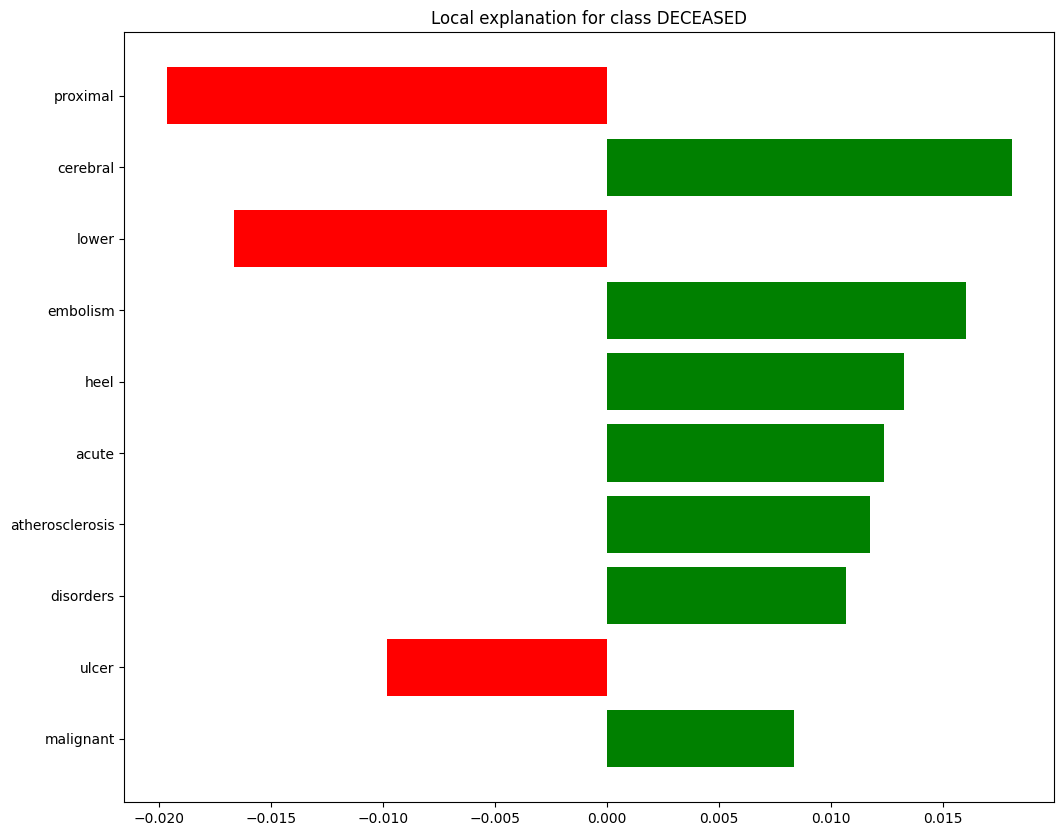

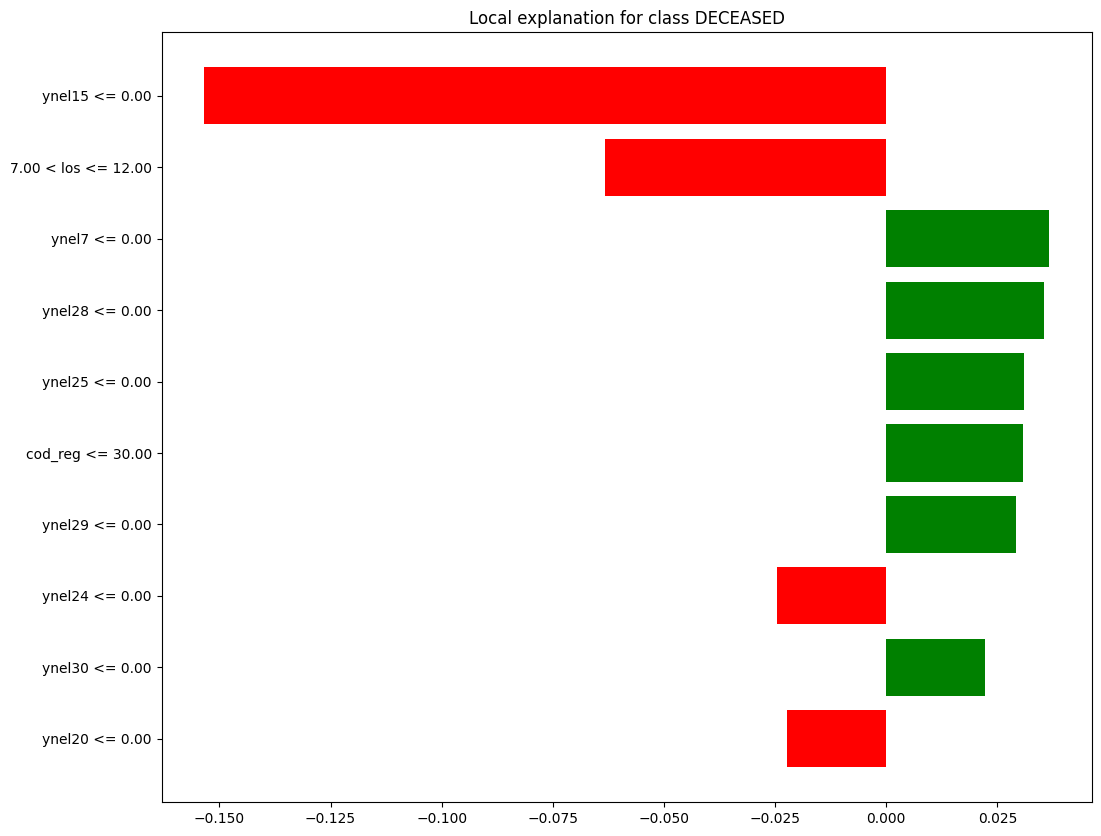

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import numpy as np
import pandas as pd

# Monta Google Drive


# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DECEASED'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DECEASED'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = 1999
test_text_sample = df['DIAGNOSI'].iloc[index]
test_structured_sample = test_structured[index].reshape(1, -1)
test_label = y.iloc[index]

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=10
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=10
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])


# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DEAD")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DEAD")



# Mostra le spiegazioni nel notebook
graph_text = text_explanation.as_pyplot_figure()
graph_structured = structured_explanation.as_pyplot_figure()


# Aumenta le dimensioni delle figure salvate
graph_text.set_size_inches(12, 10)
graph_structured.set_size_inches(12, 10)

# Specifica il percorso di salvataggio su Google Drive
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati /4'
text_explanation_path = os.path.join(save_dir, 'lime_text_explanation_VERO_NEGATIVO2.png')
structured_explanation_path = os.path.join(save_dir, 'lime_structured_explanation_VERO_NEGATIVO2.png')

# Salva le spiegazioni in formato PNG nel percorso specificato
graph_text.savefig(text_explanation_path)
graph_structured.savefig(structured_explanation_path)

plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Testo campione: malignant neoplasm lateral wall urinary bladder diabetes mellitus without mention complication type juvenile type stated uncontrolled acute posthemorrhagic anemia
Variabili strutturali campione: [[ 75  21   0  81 120  91  58   0   0   0   0   1   0   0   1   0   0   0
    0   0   0   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0
    0   0   4]]
Classe originale: SURVIVED
Classe predetta: SURVIVED


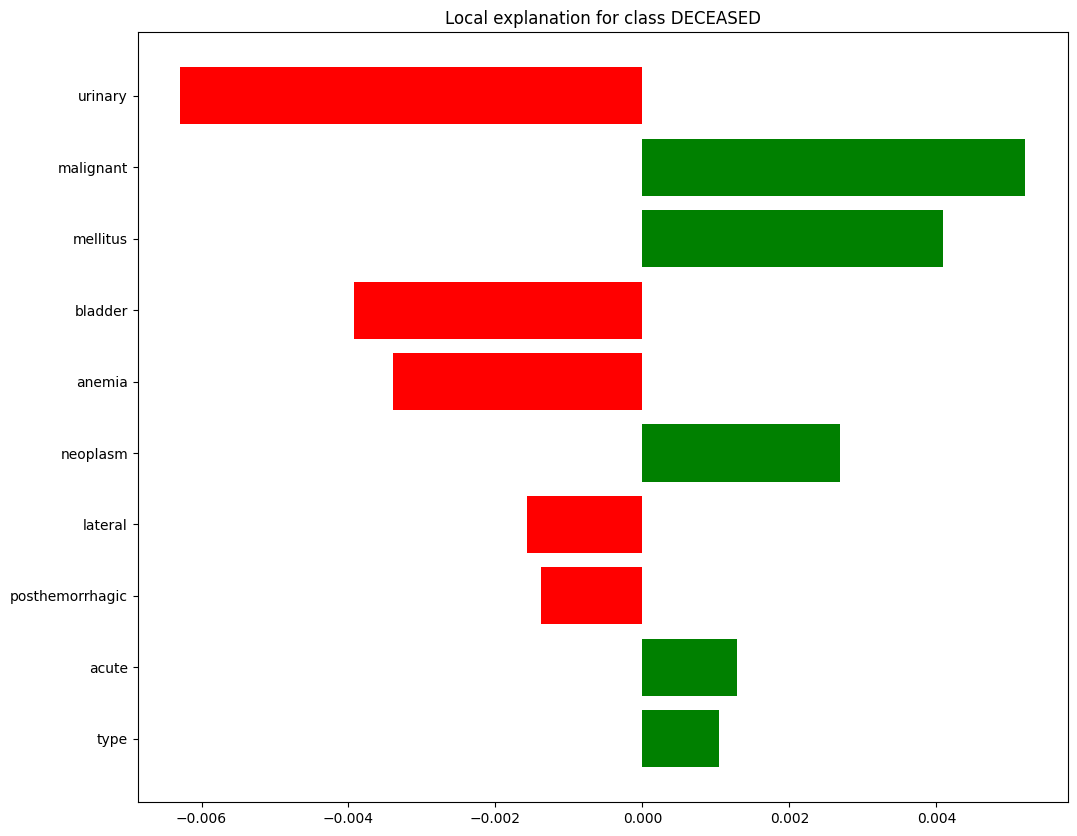

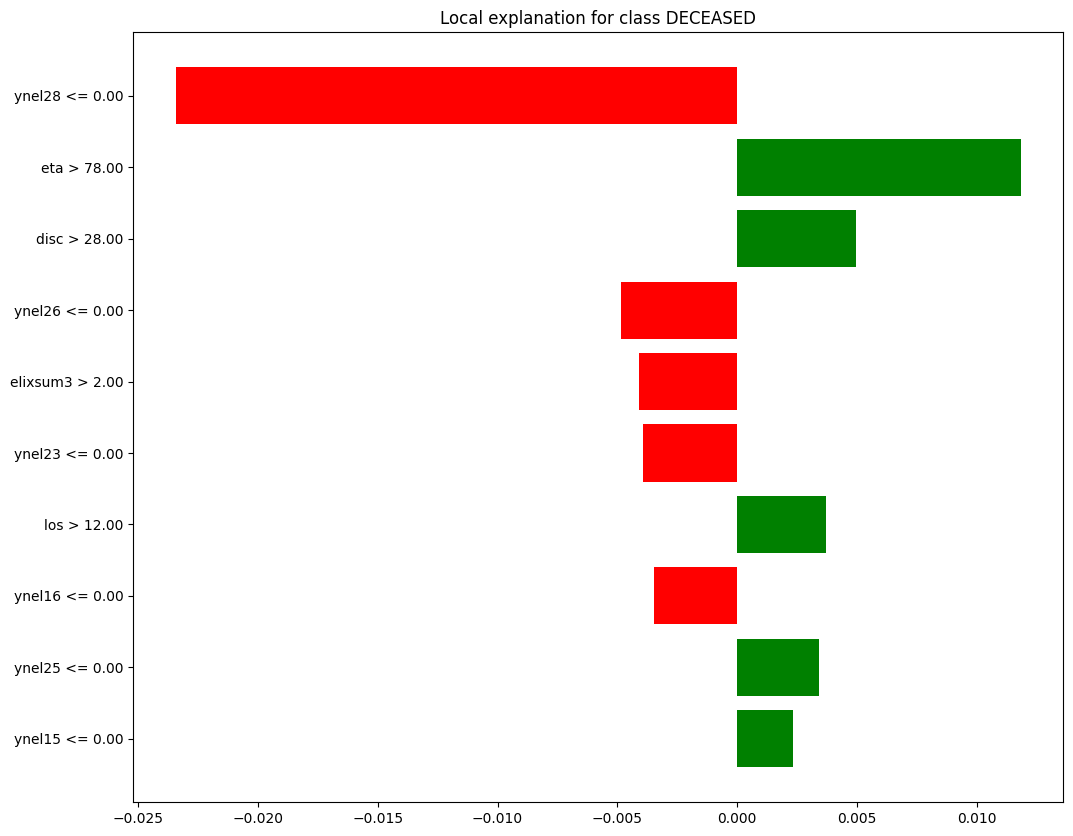

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import numpy as np
import pandas as pd

# Monta Google Drive


# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DECEASED'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DECEASED'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = 1998
test_text_sample = df['DIAGNOSI'].iloc[index]
test_structured_sample = test_structured[index].reshape(1, -1)
test_label = y.iloc[index]

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=10
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=10
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])


# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DECEASED")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DECEASED")



# Mostra le spiegazioni nel notebook
graph_text = text_explanation.as_pyplot_figure()
graph_structured = structured_explanation.as_pyplot_figure()


# Aumenta le dimensioni delle figure salvate
graph_text.set_size_inches(12, 10)
graph_structured.set_size_inches(12, 10)

# Specifica il percorso di salvataggio su Google Drive
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati /4'
text_explanation_path = os.path.join(save_dir, 'lime_text_explanation_VERO_NEGATIVO3.png')
structured_explanation_path = os.path.join(save_dir, 'lime_structured_explanation_VERO_NEGATIVO3.png')

# Salva le spiegazioni in formato PNG nel percorso specificato
graph_text.savefig(text_explanation_path)
graph_structured.savefig(structured_explanation_path)

plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Testo campione: closed fracture intracapsular section neck femur unspecified malignant neoplasm upper lobe bronchus lung
Variabili strutturali campione: [[ 7 15  0 65 30 71 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0  0  0  0  0  0  0  0  0  0  0  0  1]]
Classe originale: SURVIVED
Classe predetta: SURVIVED


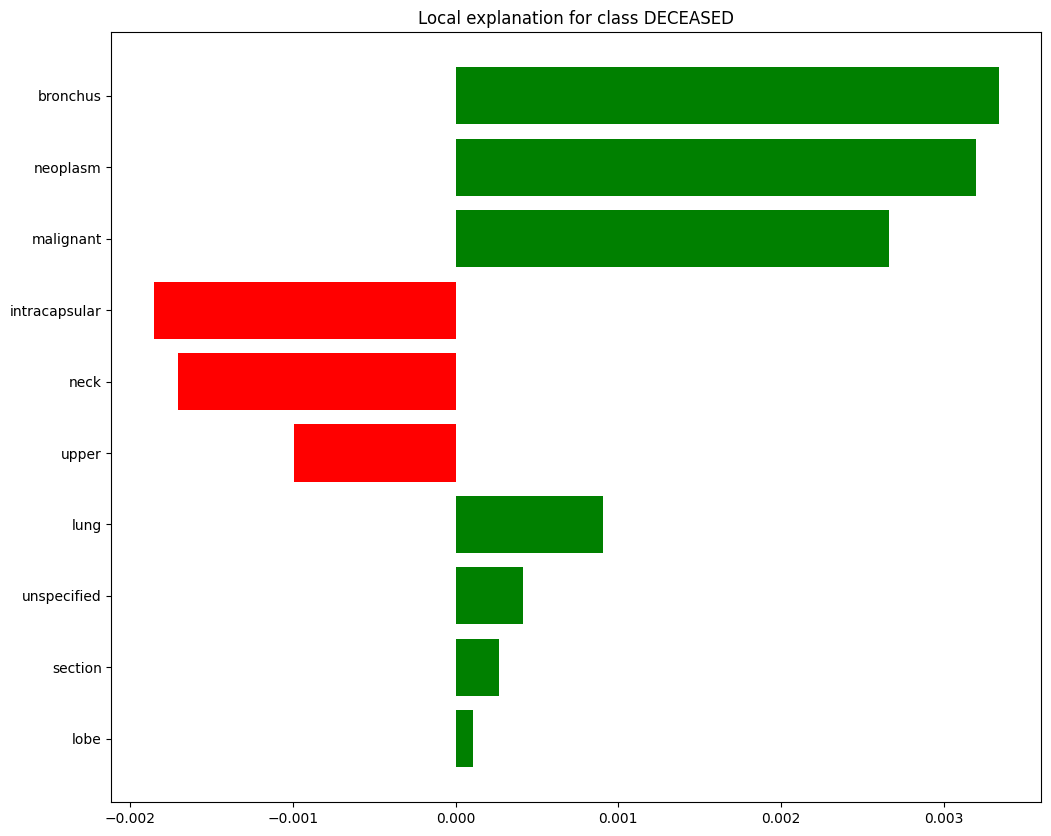

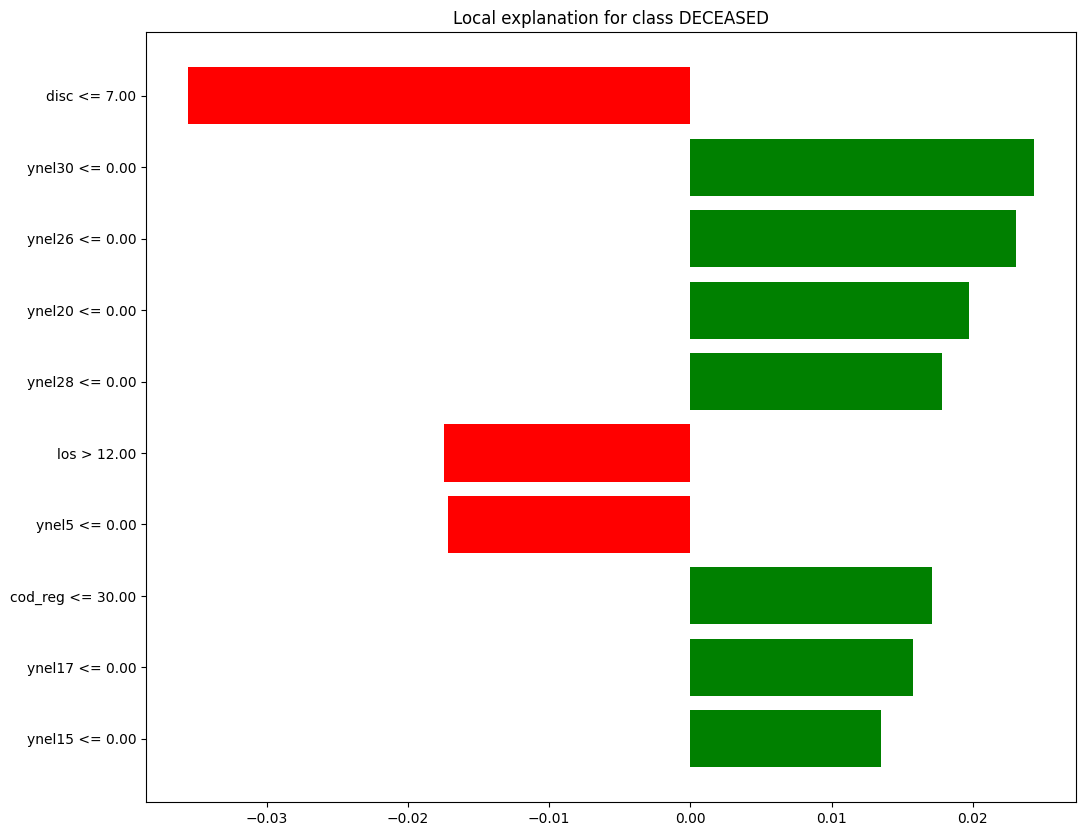

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import numpy as np
import pandas as pd

# Monta Google Drive


# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DECEASED'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DECEASED'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = 526489
test_text_sample = df['DIAGNOSI'].iloc[index]
test_structured_sample = test_structured[index].reshape(1, -1)
test_label = y.iloc[index]

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=10
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=10
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])


# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DECEASED")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DECEASED")


# Mostra le spiegazioni nel notebook
graph_text = text_explanation.as_pyplot_figure()
graph_structured = structured_explanation.as_pyplot_figure()


# Aumenta le dimensioni delle figure salvate
graph_text.set_size_inches(12, 10)
graph_structured.set_size_inches(12, 10)

# Specifica il percorso di salvataggio su Google Drive
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati /4'
text_explanation_path = os.path.join(save_dir, 'lime_text_explanation_VERO_NEGATIVO4.png')
structured_explanation_path = os.path.join(save_dir, 'lime_structured_explanation_VERO_NEGATIVO4.png')

# Salva le spiegazioni in formato PNG nel percorso specificato
graph_text.savefig(text_explanation_path)
graph_structured.savefig(structured_explanation_path)

plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Testo campione: acute respiratory failure malignant neoplasm bronchus lung unspecified secondary malignant neoplasm bone bone marrow atrial fibrillation
Variabili strutturali campione: [[ 34   3   0  83 190  53  82   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   1]]
Classe originale: DECEASED
Classe predetta: DECEASED


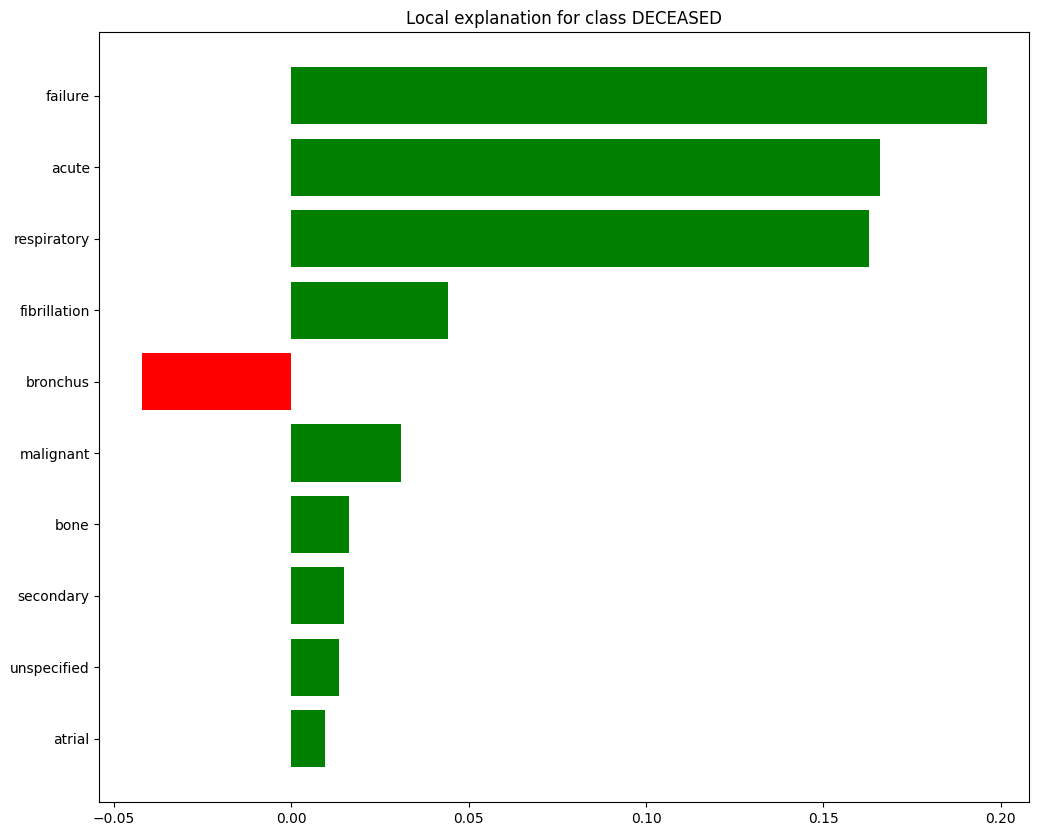

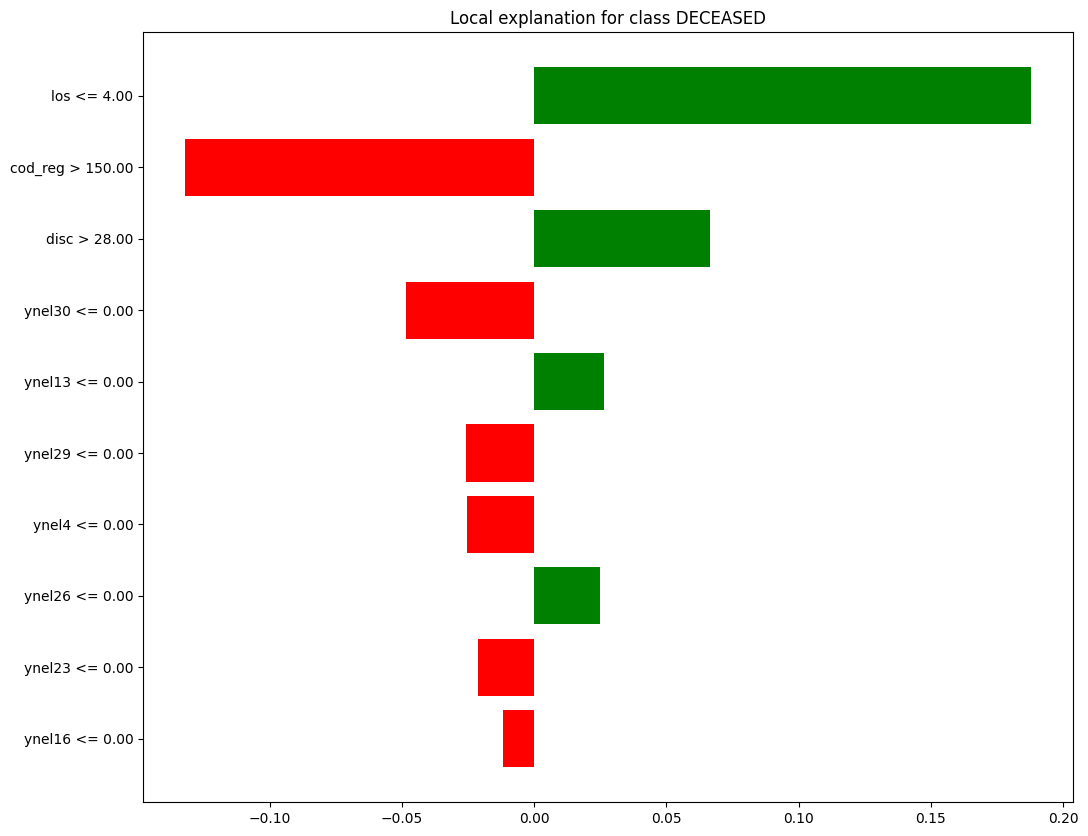

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import numpy as np
import pandas as pd

# Monta Google Drive


# Crea un LimeTextExplainer per il testo e un LimeTabularExplainer per le variabili strutturali
text_explainer = LimeTextExplainer(class_names=['SURVIVED', 'DECEASED'])
structured_explainer = LimeTabularExplainer(
    training_data=test_structured,  # Usa i dati strutturali di training
    feature_names=structured_features,  # Nomi delle variabili strutturali
    class_names=['SURVIVED', 'DECEASED'],
    discretize_continuous=True
)

# Funzione di predizione combinata per Lime
def lime_predict_combined(inputs):
    texts, structured = inputs

    # Prepara il testo
    tokens = tokenizer(
        texts,
        max_length=MAX_LEN,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Prepara i dati per il modello
    input_data = {
        "input_ids": tokens['input_ids'],
        "attention_mask": tokens['attention_mask'],
        "structured": structured
    }

    # Previsioni del modello
    predictions = model.predict(input_data)
    return np.hstack((1 - predictions, predictions))  # Convertire in probabilità per ciascuna classe

# Seleziona un campione di dati dal dataset di test
index = 111563
test_text_sample = df['DIAGNOSI'].iloc[index]
test_structured_sample = test_structured[index].reshape(1, -1)
test_label = y.iloc[index]

# Esegui Lime sul campione di testo
text_explanation = text_explainer.explain_instance(
    test_text_sample,
    lambda texts: lime_predict_combined((texts, np.tile(test_structured_sample, (len(texts), 1)))),
    num_features=10
)

# Esegui Lime sulle variabili strutturali
structured_explanation = structured_explainer.explain_instance(
    test_structured_sample.flatten(),
    lambda structured: lime_predict_combined(([test_text_sample] * len(structured), np.array(structured))),
    num_features=10
)

# Aggiungi informazioni di classe originale e predetta alle spiegazioni
predicted_class = np.argmax(lime_predict_combined(([test_text_sample], test_structured_sample))[0])


# Stampa le informazioni combinate
print("Testo campione:", test_text_sample)
print("Variabili strutturali campione:", test_structured_sample)
print("Classe originale:", "SURVIVED" if test_label == 0 else "DECEASED")
print("Classe predetta:", "SURVIVED" if predicted_class == 0 else "DECEASED")


# Mostra le spiegazioni nel notebook
graph_text = text_explanation.as_pyplot_figure()
graph_structured = structured_explanation.as_pyplot_figure()


# Aumenta le dimensioni delle figure salvate
graph_text.set_size_inches(12, 10)
graph_structured.set_size_inches(12, 10)

# Specifica il percorso di salvataggio su Google Drive
save_dir = '/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati /4'
text_explanation_path = os.path.join(save_dir, 'lime_text_explanation_VERO_NEGATIVO5.png')
structured_explanation_path = os.path.join(save_dir, 'lime_structured_explanation_VERO_NEGATIVO5.png')

# Salva le spiegazioni in formato PNG nel percorso specificato
graph_text.savefig(text_explanation_path)
graph_structured.savefig(structured_explanation_path)

plt.show()